# **IMPORT THƯ VIỆN**

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Chỉ định thư mục làm việc hiện hành
import os
colab_dir = '/content/gdrive/My Drive/DATA VISUALIZATION'
my_dir    = '/Final Project'
path      = colab_dir + my_dir

# Chuyển thư mục hiện hành
%cd $path

Mounted at /content/gdrive
/content/gdrive/My Drive/DATA VISUALIZATION/Final Project


In [ ]:
##------------------------------------------------------------------------------
## Thư viện
##------------------------------------------------------------------------------
import imageio
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import plotly.express    as px
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from IPython.display         import Image
from sklearn                 import linear_model, svm, tree
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import BernoulliNB, GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from scipy.cluster          import hierarchy
from scipy.spatial.distance import cdist
from sklearn.cluster        import KMeans, AgglomerativeClustering
from sklearn.preprocessing  import MinMaxScaler, StandardScaler

import statsmodels.api   as sm
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import scipy.stats as stats

#from sklearn.metrics import plot_confusion_matrix

## **Kiểm tra dữ liệu**

In [ ]:
##------------------------------------------------------------------------------
## Dữ liệu
##------------------------------------------------------------------------------
data = pd.read_csv('Starbucks satisfactory survey.csv')
display(data.head(10), '\n')

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


'\n'

In [ ]:
list(data.columns)

['Timestamp',
 '1. Your Gender',
 '2. Your Age',
 '3. Are you currently....?',
 '4. What is your annual income?',
 '5. How often do you visit Starbucks?',
 '6. How do you usually enjoy Starbucks?',
 '7. How much time do you normally  spend during your visit?',
 "8. The nearest Starbucks's outlet to you is...?",
 '9. Do you have Starbucks membership card?',
 '10. What do you most frequently purchase at Starbucks?',
 '11. On average, how much would you spend at Starbucks per visit?',
 '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
 '13. How would you rate the price range at Starbucks?',
 '14. How important are sales and promotions in your purchase decision?',
 '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
 '16. You rate the WiFi quality at Starbucks as..',
 '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)',
 '18. How likely you will choose Starbuc

In [ ]:
# Xem thông tin chi tiết của các cột => Kiểm tra xem cột nào bị thiếu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [ ]:
display(data.describe())

,"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#**TIỀN XỬ LÝ DỮ LIỆU**

In [ ]:
display(data)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [ ]:
len(data)-data.count()

Timestamp                                                                                                                 0
1. Your Gender                                                                                                            0
2. Your Age                                                                                                               0
3. Are you currently....?                                                                                                 0
4. What is your annual income?                                                                                            0
5. How often do you visit Starbucks?                                                                                      0
6. How do you usually enjoy Starbucks?                                                                                    1
7. How much time do you normally  spend during your visit?                                                                0
8. The n

**==> Nếu có missing value -> Thay bằng giá trị none**

In [ ]:
data = data.fillna('none')

In [ ]:
data = data.drop(columns = ['Timestamp']) #loại bỏ cột timestamp

## Label encoding

In [ ]:
for i in list(data.columns):
  print(data[i].unique().tolist())

['Female', 'Male']
['From 20 to 29', 'From 30 to 39', '40 and above', 'Below 20']
['Student', 'Employed', 'Self-employed', 'Housewife']
['Less than RM25,000', 'RM50,000 - RM100,000', 'RM25,000 - RM50,000', 'RM100,000 - RM150,000', 'More than RM150,000']
['Rarely', 'Monthly', 'Weekly', 'Never', 'Daily']
['Dine in', 'Take away', 'Drive-thru', 'never', 'Never buy', 'none', 'I dont like coffee', 'Never', 'Never ']
['Between 30 minutes to 1 hour', 'Below 30 minutes', 'More than 3 hours', 'Between 1 hour to 2 hours', 'Between 2 hours to 3 hours']
['within 1km', '1km - 3km', 'more than 3km']
['Yes', 'No']
['Coffee', 'Cold drinks;Pastries', 'Coffee;Sandwiches', 'Cold drinks', 'Coffee;Cold drinks', 'Cold drinks;Pastries;Sandwiches', 'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Pastries;Sandwiches', 'Coffee;Pastries', 'Cold drinks;Juices;Pastries', 'Coffee;Cold drinks;Pastries;Sandwiches', 'Never', 'Never buy any', 'Jaws chip ', 'cake ', 'Pastries', 'Cold drinks;Never', 'never', 'Nothing ', 'Cof

In [ ]:
cols = list(data.columns)

In [ ]:
cols_names = [i for i in cols if i not in [cols[9],cols[18]]]
cols_names = [i for i in cols_names if i not in cols_names[10:17]]

In [ ]:
cols_names

['1. Your Gender',
 '2. Your Age',
 '3. Are you currently....?',
 '4. What is your annual income?',
 '5. How often do you visit Starbucks?',
 '6. How do you usually enjoy Starbucks?',
 '7. How much time do you normally  spend during your visit?',
 "8. The nearest Starbucks's outlet to you is...?",
 '9. Do you have Starbucks membership card?',
 '11. On average, how much would you spend at Starbucks per visit?',
 '20. Will you continue buying at Starbucks?']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
for i in cols_names:
  data[i] = ord_enc.fit_transform(data[[i]]).astype('int')

In [ ]:
for i in list(data.columns):
  print(data[i].unique().tolist())

[0, 1]
[2, 3, 0, 1]
[3, 0, 2, 1]
[0, 4, 3, 2, 1]
[3, 1, 4, 2, 0]
[0, 6, 1, 7, 5, 8, 2, 3, 4]
[3, 0, 4, 1, 2]
[2, 0, 1]
[1, 0]
['Coffee', 'Cold drinks;Pastries', 'Coffee;Sandwiches', 'Cold drinks', 'Coffee;Cold drinks', 'Cold drinks;Pastries;Sandwiches', 'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Pastries;Sandwiches', 'Coffee;Pastries', 'Cold drinks;Juices;Pastries', 'Coffee;Cold drinks;Pastries;Sandwiches', 'Never', 'Never buy any', 'Jaws chip ', 'cake ', 'Pastries', 'Cold drinks;Never', 'never', 'Nothing ', 'Coffee;Cold drinks;Juices;Pastries;Sandwiches']
[1, 0, 2, 3]
[4, 2, 3, 5, 1]
[3, 1, 5, 2, 4]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[4, 3, 2, 5, 1]
[4, 5, 3, 2, 1]
[3, 2, 4, 5, 1]
['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)', 'Social Media;In Store displays', 'In Store displays;Billboards', 'Through friends and word of mouth', 'Starbucks Website/Apps;Social Media', 'Social Media', 'Starbucks Website/Apps;Social Media;Emails;Through friends and word of

In [ ]:
data

,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,0,2,3,0,3,0,3,2,1,Coffee,1,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,1
1,0,2,3,0,3,6,0,0,1,Cold drinks;Pastries,1,4,3,4,4,4,5,2,Social Media;In Store displays,1
2,1,2,0,0,1,0,3,1,1,Coffee,1,4,3,4,4,4,4,3,In Store displays;Billboards,1
3,0,2,3,0,3,6,0,1,0,Coffee,1,2,1,4,3,3,3,3,Through friends and word of mouth,0
4,1,2,3,0,1,6,3,0,0,Coffee;Sandwiches,0,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1,0,2,3,1,0,1,0,1,Coffee,0,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,1
118,1,2,0,0,1,0,1,0,1,Coffee;Cold drinks;Juices;Pastries;Sandwiches,2,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,1
119,1,2,3,0,3,0,3,0,0,Coffee;Cold drinks,1,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,0
120,0,2,0,0,3,6,0,2,0,Coffee,1,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,1


##**Split promomethod**

In [ ]:
data['19. How do you come to hear of promotions at Starbucks? Check all that apply.'] = data['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].str.replace(';','; ')

In [ ]:
data['count'] = data['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].str.len()

In [ ]:
data.sort_values('count', inplace = True)

In [ ]:
data

,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,...,"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?,count
81,1,2,0,0,2,8,0,1,0,Never buy any,...,1,1,1,3,3,3,3,none,0,4
19,0,2,2,4,3,6,0,0,1,Cold drinks,...,3,4,3,4,3,4,2,Emails,1,6
90,0,3,0,4,4,0,1,1,1,Coffee,...,4,4,5,4,4,5,4,Emails,1,6
67,0,2,2,0,2,5,0,1,0,Never,...,3,3,3,3,3,3,3,Never hear,0,10
112,1,2,3,1,2,4,0,1,0,Nothing,...,1,1,1,1,1,1,1,Billboards,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,2,0,3,3,6,0,1,1,Coffee,...,3,3,4,5,4,4,4,"Social Media; Deal sites (fave, iprice, etc......",1,82
28,1,0,2,1,4,1,0,0,1,Coffee,...,4,5,3,3,3,4,5,Starbucks Website/Apps; Social Media; Through ...,1,90
52,0,0,1,0,1,6,0,1,1,Cold drinks;Juices;Pastries,...,5,4,3,5,3,5,5,Starbucks Website/Apps; Social Media; Deal sit...,1,106
47,0,2,2,0,3,6,3,1,0,Coffee,...,3,1,5,4,3,3,2,"Social Media; Emails; Deal sites (fave, iprice...",1,121


In [ ]:
promomethod_list = data['19. How do you come to hear of promotions at Starbucks? Check all that apply.'][118].split('; ')

In [ ]:
promomethod_list

['Starbucks Website/Apps',
 'Social Media',
 'Emails',
 'Deal sites (fave, iprice, etc...)',
 'Through friends and word of mouth',
 'In Store displays',
 'Billboards']

In [ ]:
def check(x,i):
  return 1 if x['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].find(i)!=-1 else 0

In [ ]:
for i in promomethod_list:
  data[i] = data.apply(lambda x: check(x,i), axis=1)

In [ ]:
data

,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,...,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?,count,Starbucks Website/Apps,Social Media,Emails,"Deal sites (fave, iprice, etc...)",Through friends and word of mouth,In Store displays,Billboards
81,1,2,0,0,2,8,0,1,0,Never buy any,...,none,0,4,0,0,0,0,0,0,0
19,0,2,2,4,3,6,0,0,1,Cold drinks,...,Emails,1,6,0,0,1,0,0,0,0
90,0,3,0,4,4,0,1,1,1,Coffee,...,Emails,1,6,0,0,1,0,0,0,0
67,0,2,2,0,2,5,0,1,0,Never,...,Never hear,0,10,0,0,0,0,0,0,0
112,1,2,3,1,2,4,0,1,0,Nothing,...,Billboards,0,10,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,2,0,3,3,6,0,1,1,Coffee,...,"Social Media; Deal sites (fave, iprice, etc......",1,82,0,1,0,1,1,0,0
28,1,0,2,1,4,1,0,0,1,Coffee,...,Starbucks Website/Apps; Social Media; Through ...,1,90,1,1,0,0,1,1,0
52,0,0,1,0,1,6,0,1,1,Cold drinks;Juices;Pastries,...,Starbucks Website/Apps; Social Media; Deal sit...,1,106,1,1,0,1,1,0,0
47,0,2,2,0,3,6,3,1,0,Coffee,...,"Social Media; Emails; Deal sites (fave, iprice...",1,121,0,1,1,1,1,1,1


In [ ]:
data = data.drop(columns = ['19. How do you come to hear of promotions at Starbucks? Check all that apply.','count'])

##**Split itempurchase**

In [ ]:
data[ '10. What do you most frequently purchase at Starbucks?'] = data[ '10. What do you most frequently purchase at Starbucks?'].str.replace(';','; ')

In [ ]:
data['count'] = data[ '10. What do you most frequently purchase at Starbucks?'].str.len()

In [ ]:
data.sort_values('count', ascending = False, inplace = True)

In [ ]:
data

,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,...,18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,20. Will you continue buying at Starbucks?,Starbucks Website/Apps,Social Media,Emails,"Deal sites (fave, iprice, etc...)",Through friends and word of mouth,In Store displays,Billboards,count
118,1,2,0,0,1,0,1,0,1,Coffee; Cold drinks; Juices; Pastries; Sandwiches,...,5,1,1,1,1,1,1,1,1,49
66,0,2,2,3,1,0,0,2,1,Coffee; Cold drinks; Pastries; Sandwiches,...,4,1,1,1,1,0,1,0,0,41
24,1,0,2,2,3,0,1,1,0,Coffee; Juices; Pastries; Sandwiches,...,5,1,0,0,0,0,1,1,0,36
23,0,2,3,0,1,1,1,0,1,Cold drinks; Pastries; Sandwiches,...,3,1,0,1,0,0,1,0,0,33
52,0,0,1,0,1,6,0,1,1,Cold drinks; Juices; Pastries,...,5,1,1,1,0,1,1,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1,1,3,0,1,0,0,0,0,Coffee,...,3,1,0,1,0,0,0,0,0,6
22,1,2,0,3,3,0,4,2,0,Coffee,...,3,0,0,0,0,0,1,0,0,6
67,0,2,2,0,2,5,0,1,0,Never,...,3,0,0,0,0,0,0,0,0,5
108,1,2,3,0,2,7,0,2,0,never,...,4,0,0,0,0,0,1,0,0,5


In [ ]:
promomethod_list = data[ '10. What do you most frequently purchase at Starbucks?'][118].split('; ')

In [ ]:
promomethod_list

['Coffee', 'Cold drinks', 'Juices', 'Pastries', 'Sandwiches']

In [ ]:
def check(x,i):
  return 1 if x[ '10. What do you most frequently purchase at Starbucks?'].find(i)!=-1 else 0

In [ ]:
for i in promomethod_list:
  data[i] = data.apply(lambda x: check(x,i), axis=1)

In [ ]:
data

,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,...,"Deal sites (fave, iprice, etc...)",Through friends and word of mouth,In Store displays,Billboards,count,Coffee,Cold drinks,Juices,Pastries,Sandwiches
118,1,2,0,0,1,0,1,0,1,Coffee; Cold drinks; Juices; Pastries; Sandwiches,...,1,1,1,1,49,1,1,1,1,1
66,0,2,2,3,1,0,0,2,1,Coffee; Cold drinks; Pastries; Sandwiches,...,0,1,0,0,41,1,1,0,1,1
24,1,0,2,2,3,0,1,1,0,Coffee; Juices; Pastries; Sandwiches,...,0,1,1,0,36,1,0,1,1,1
23,0,2,3,0,1,1,1,0,1,Cold drinks; Pastries; Sandwiches,...,0,1,0,0,33,0,1,0,1,1
52,0,0,1,0,1,6,0,1,1,Cold drinks; Juices; Pastries,...,1,1,0,0,29,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1,1,3,0,1,0,0,0,0,Coffee,...,0,0,0,0,6,1,0,0,0,0
22,1,2,0,3,3,0,4,2,0,Coffee,...,0,1,0,0,6,1,0,0,0,0
67,0,2,2,0,2,5,0,1,0,Never,...,0,0,0,0,5,0,0,0,0,0
108,1,2,3,0,2,7,0,2,0,never,...,0,1,0,0,5,0,0,0,0,0


In [ ]:
data = data.drop(columns = [ '10. What do you most frequently purchase at Starbucks?','count'])

## **Rename columns**

In [ ]:
list(data.columns)

['1. Your Gender',
 '2. Your Age',
 '3. Are you currently....?',
 '4. What is your annual income?',
 '5. How often do you visit Starbucks?',
 '6. How do you usually enjoy Starbucks?',
 '7. How much time do you normally  spend during your visit?',
 "8. The nearest Starbucks's outlet to you is...?",
 '9. Do you have Starbucks membership card?',
 '11. On average, how much would you spend at Starbucks per visit?',
 '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
 '13. How would you rate the price range at Starbucks?',
 '14. How important are sales and promotions in your purchase decision?',
 '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
 '16. You rate the WiFi quality at Starbucks as..',
 '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)',
 '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?',
 '20. Will you 

In [ ]:
new_cols = ['1. Your Gender',
 '2. Your Age',
 '3. Are you currently....?',
 '4. What is your annual income?',
 '5. How often do you visit Starbucks?',
 '6. How do you usually enjoy Starbucks?',
 '7. How much time do you normally  spend during your visit?',
 "8. The nearest Starbucks's outlet to you is...?",
 '9. Do you have Starbucks membership card?',
 'Coffee',
 'Cold drinks',
 'Juices',
 'Pastries',
 'Sandwiches',
 '11. On average, how much would you spend at Starbucks per visit?',
 '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
 '13. How would you rate the price range at Starbucks?',
 '14. How important are sales and promotions in your purchase decision?',
 '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
 '16. You rate the WiFi quality at Starbucks as..',
 '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)',
 '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?',
 'Starbucks Website/Apps',
 'Social Media',
 'Emails',
 'Deal sites (fave, iprice, etc...)',
 'Through friends and word of mouth',
 'In Store displays',
 'Billboards',
 '20. Will you continue buying at Starbucks?'
 ]

In [ ]:
data = data.reindex(columns=new_cols)

In [ ]:
new_cols_name = ['gender',
 'age',
 'status',
 'income',
 'visitNo',
 'method',
 'timeSpend',
 'location',
 'membershipCard',
 'itemPurchaseCoffee',
 'itempurchaseCold',
 'itemPurchasePastries',
 'itemPurchaseJuices',
 'itemPurchaseSandwiches',
 'spendPurchase',
 'productRate',
 'priceRate',
 'promoRate',
 'ambianceRate',
 'wifiRate',
 'serviceRate',
 'chooseRate',
 'promoMethodApp',
 'promoMethodSoc',
 'promoMethodEmail',
 'promoMethodDeal',
 'promoMethodFriend',
 'promoMethodDisplay',
 'promoMethodBillboard',
 'loyal']

In [ ]:
cols_rename = dict(zip(new_cols, new_cols_name))

In [ ]:
data = data.rename(columns = cols_rename)

In [ ]:
data

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,serviceRate,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,loyal
118,1,2,0,0,1,0,1,0,1,1,...,5,5,1,1,1,1,1,1,1,1
66,0,2,2,3,1,0,0,2,1,1,...,4,4,1,1,1,0,1,0,0,1
24,1,0,2,2,3,0,1,1,0,1,...,3,5,0,0,0,0,1,1,0,1
23,0,2,3,0,1,1,1,0,1,0,...,4,3,0,1,0,0,1,0,0,1
52,0,0,1,0,1,6,0,1,1,0,...,5,5,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1,1,3,0,1,0,0,0,0,1,...,3,3,0,1,0,0,0,0,0,1
22,1,2,0,3,3,0,4,2,0,1,...,4,3,0,0,0,0,1,0,0,0
67,0,2,2,0,2,5,0,1,0,0,...,3,3,0,0,0,0,0,0,0,0
108,1,2,3,0,2,7,0,2,0,0,...,3,4,0,0,0,0,1,0,0,0


In [ ]:
data = data.sort_index()

In [ ]:
data

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,serviceRate,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,loyal
0,0,2,3,0,3,0,3,2,1,1,...,4,3,1,1,1,1,0,0,0,1
1,0,2,3,0,3,6,0,0,1,0,...,5,2,0,1,0,0,0,1,0,1
2,1,2,0,0,1,0,3,1,1,1,...,4,3,0,0,0,0,0,1,1,1
3,0,2,3,0,3,6,0,1,0,1,...,3,3,0,0,0,0,1,0,0,0
4,1,2,3,0,1,6,3,0,0,1,...,3,3,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1,0,2,3,1,0,1,0,1,1,...,4,4,1,1,0,0,0,0,0,1
118,1,2,0,0,1,0,1,0,1,1,...,5,5,1,1,1,1,1,1,1,1
119,1,2,3,0,3,0,3,0,0,1,...,3,4,0,1,0,0,1,1,0,0
120,0,2,0,0,3,6,0,2,0,1,...,4,4,0,1,0,0,1,0,1,1


# **GHI CHÚ CÁC CỘT**

1. Gender:
  * 0: female
  * 1: male
2. Age:
  * 0: 40 and above
  * 1: Below 20
  * 2: From 20 to 29
  * 3: From 30 to 39
3. Status:
  * 0: Employed
  * 1: Housewife
  * 2: Self-employed
  * 3: Student
4. Income:
  * 0: Less than RM25,000
  * 1: More than RM150,000
  * 2: RM100,000 – RM150,000
  * 3: RM50,000 – RM100,000
  * 4: RM25,000 – RM50,000
5. Visit:
  * 0: Daily
  * 1: Monthly
  * 2: Never
  * 3: Rarely
  * 4: Weekly
6. Method:
  * 0: Dine In
  * 1: Drive-thru
  * 2: I dont like coffee
  * 3: never
  * 4: never
  * 5: never
  * 6: Take away
  * 7: Never
  * 8: Never Buy

7. Time Spend:
  * 0: Below 30 mis
  * 1: 1h to 2h
  * 2: 2h to 3h
  * 3: 30 mins to 1h
  * 4: More than 3h

8. Location:
  * 0: 1km to 3km
  * 1: More than 3km
  * 2: Within 1km
9. MembershipCard -> itemPurchaseothers; promoMethod... -> loyal:
  * 0: no
  * 1: yes
10. SpendPurchase:
  * 1: 'Less than RM20'
  * 0: 'Around RM20 - RM40'
  * 2: 'More than RM40'
  * 3: 'Zero'
11. ...Rate:
  * 1: very bad
  * 5: excellent

# **THỐNG KÊ MÔ TẢ**

## **Trung tâm**

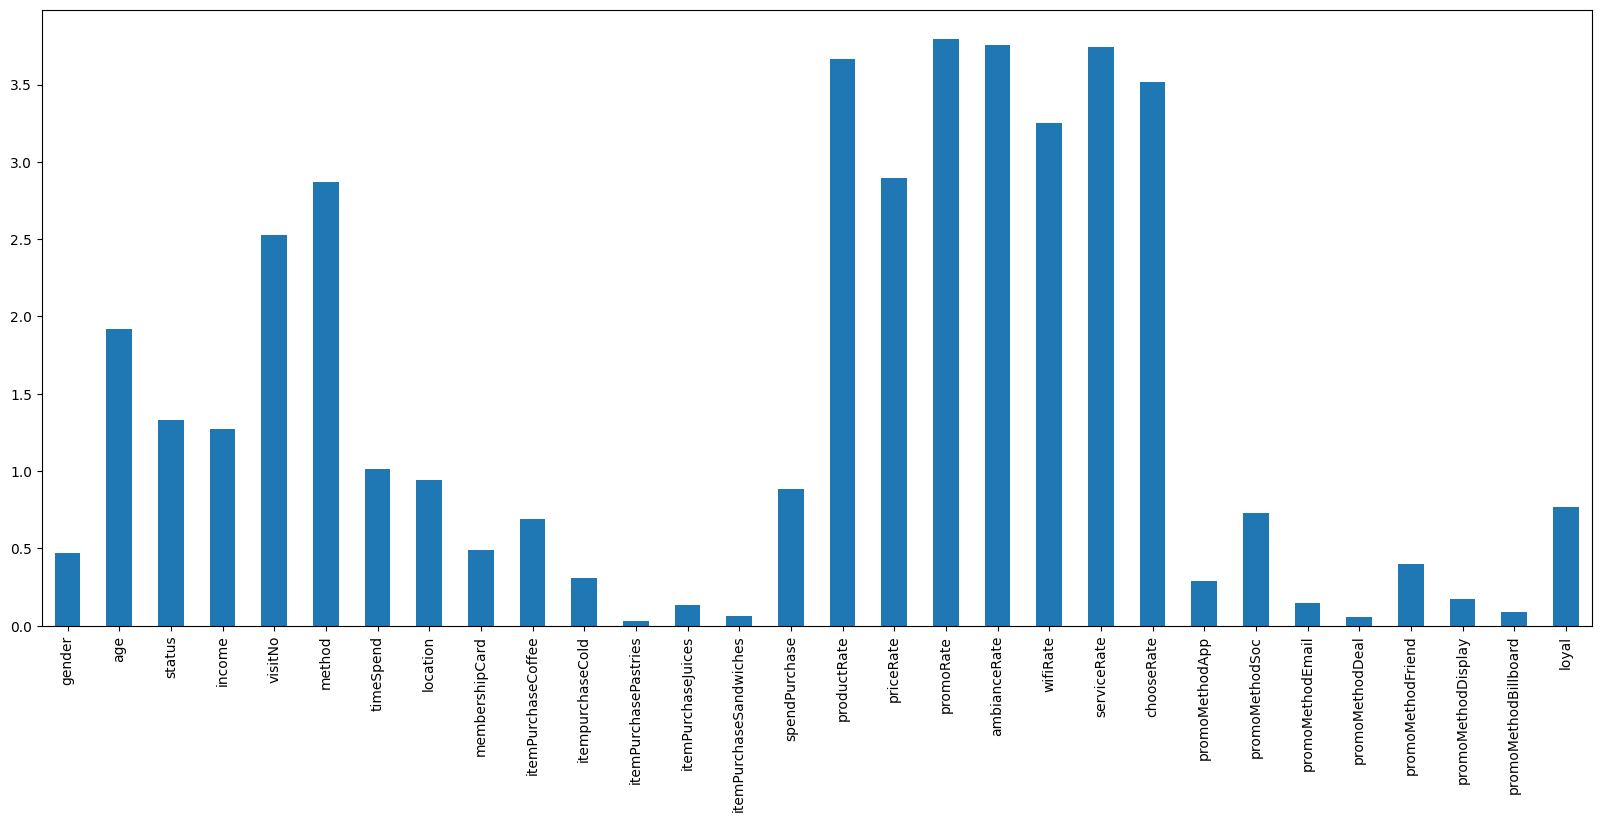

In [ ]:
data[list(data.columns)].mean().plot(kind='bar')
plt.gcf().set_size_inches(20,8)

In [ ]:
data[list(data.columns)].mode()

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,serviceRate,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,loyal
0,0,2,0,0,3,6,0,1,0,1,...,4,4,0,1,0,0,0,0,0,1


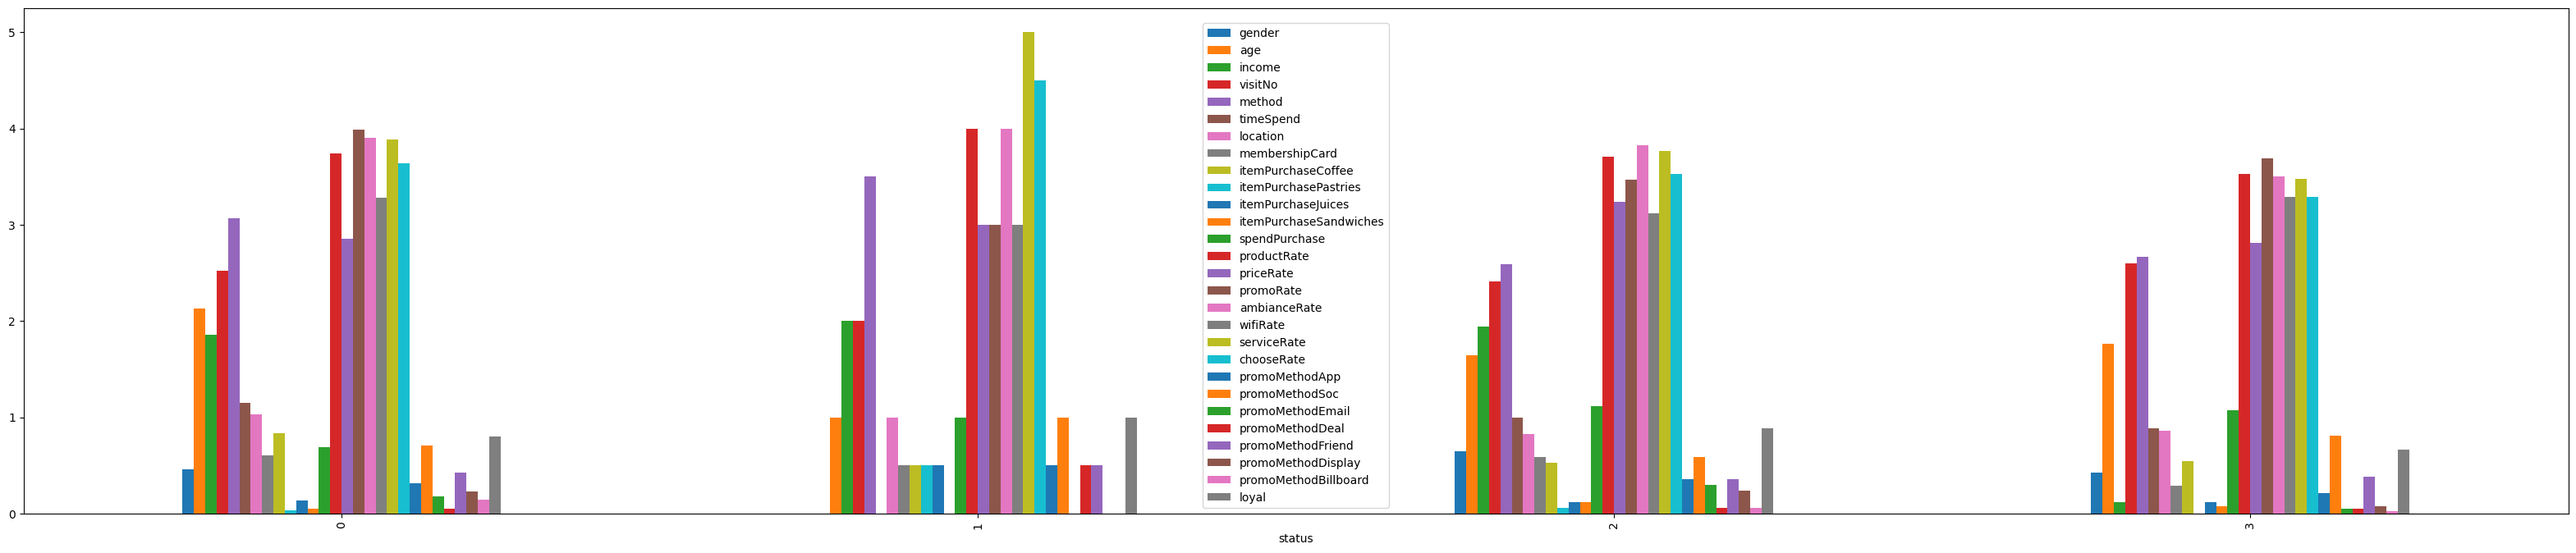

In [ ]:
data.groupby('status')[['gender','age','income','visitNo',
      'method','timeSpend','location','membershipCard','itemPurchaseCoffee','itemPurchasePastries','itemPurchaseJuices','itemPurchaseSandwiches','spendPurchase',
      'productRate','priceRate','promoRate','ambianceRate','wifiRate',
      'serviceRate','chooseRate','promoMethodApp','promoMethodSoc','promoMethodEmail','promoMethodDeal',
      'promoMethodFriend','promoMethodDisplay','promoMethodBillboard','loyal']].mean().plot(kind='bar')
plt.gcf().set_size_inches(40,8)

## **Độ phân tán**

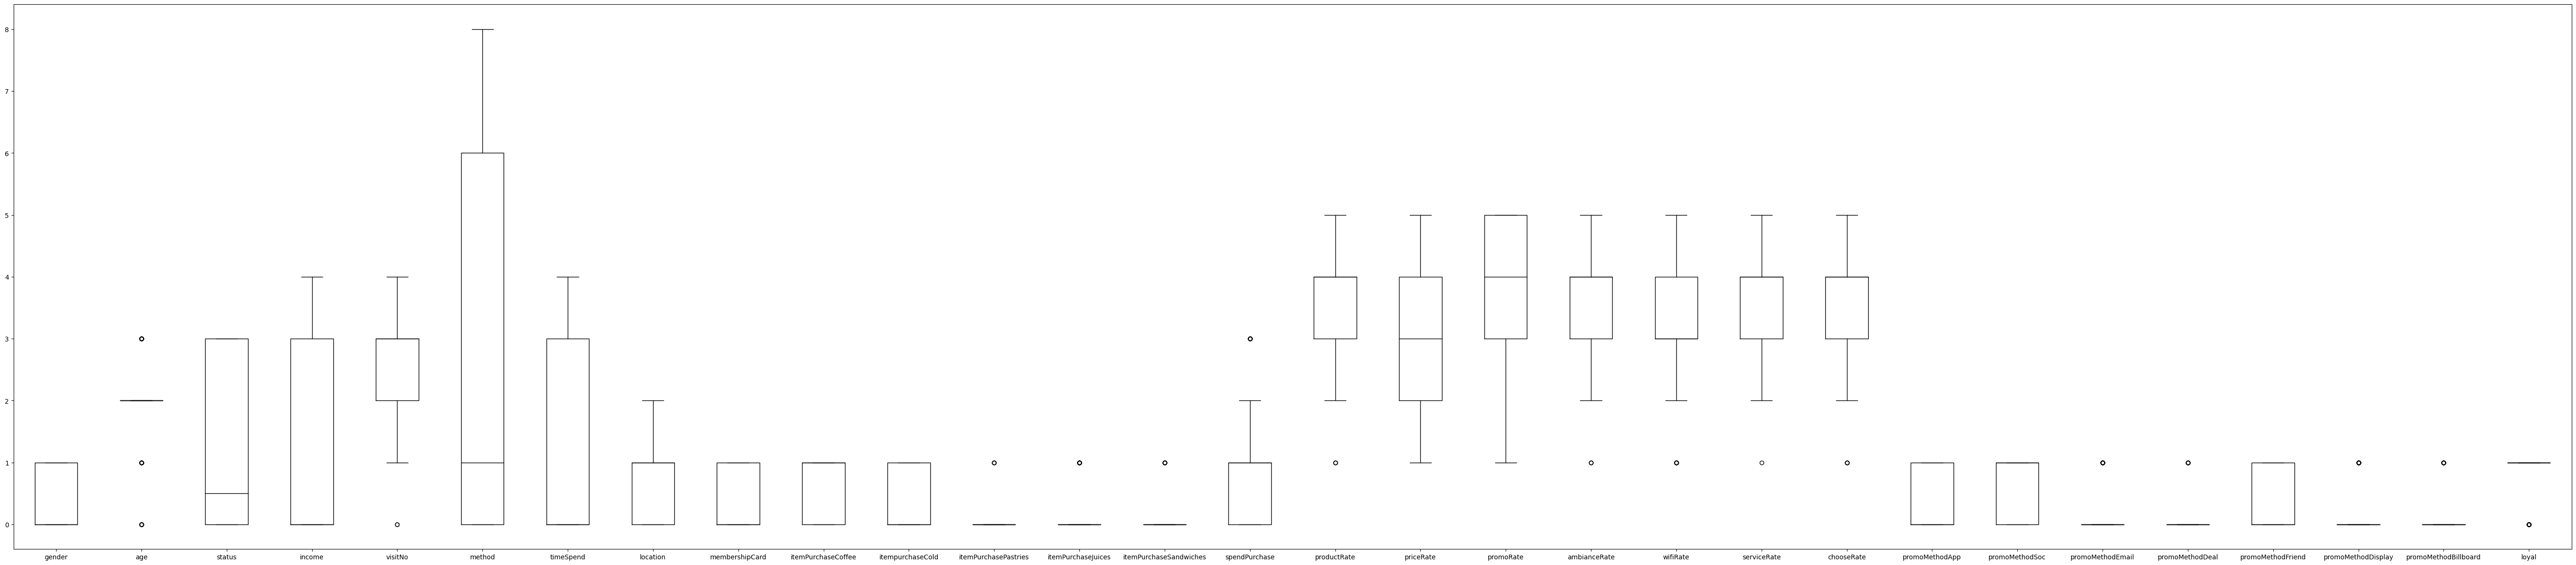

In [ ]:
data.plot(kind='box',color='black')
plt.gcf().set_size_inches(70,15)

##**Hình dáng phân phối**

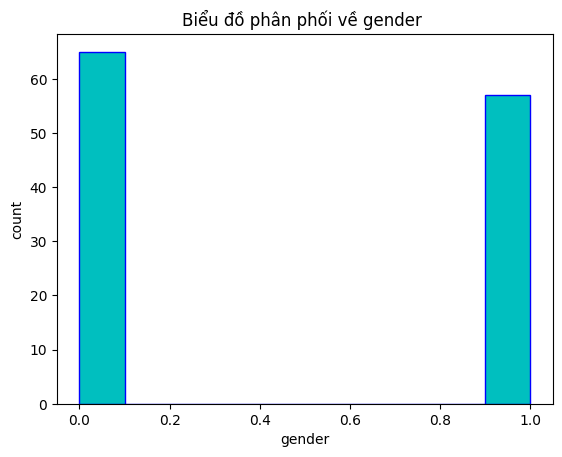

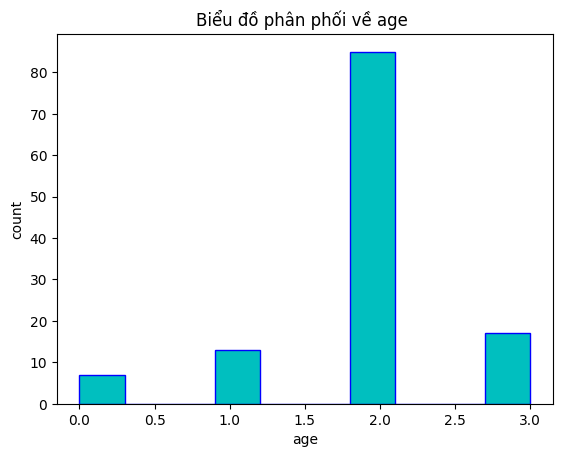

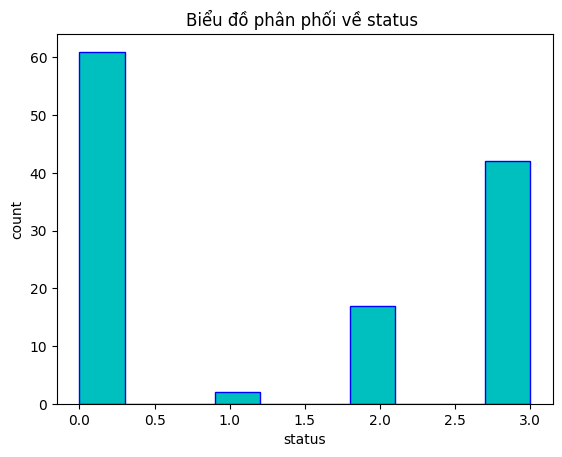

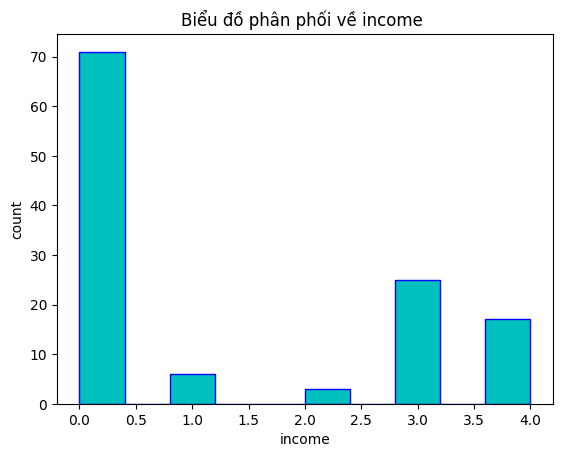

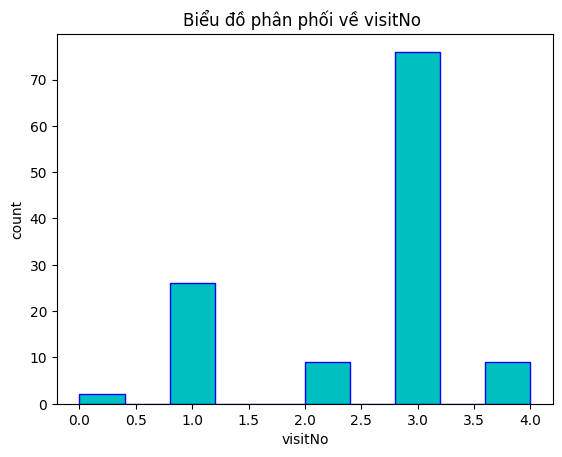

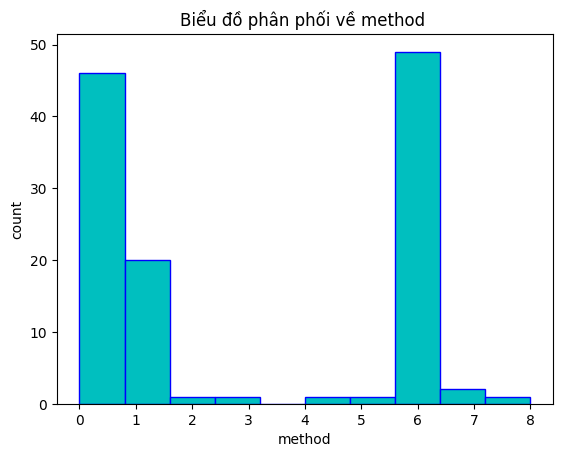

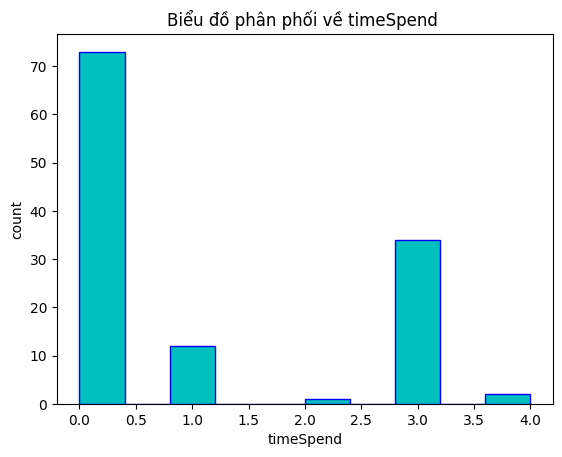

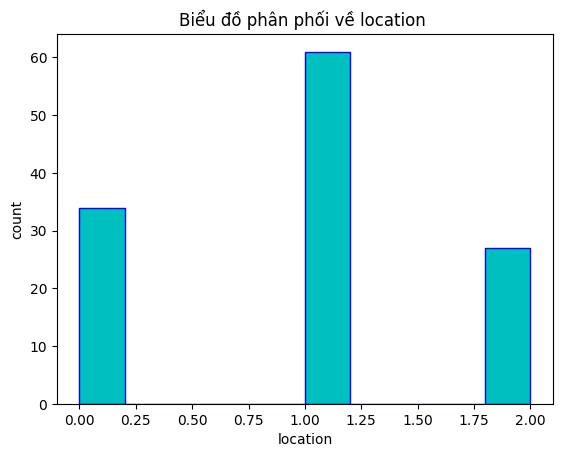

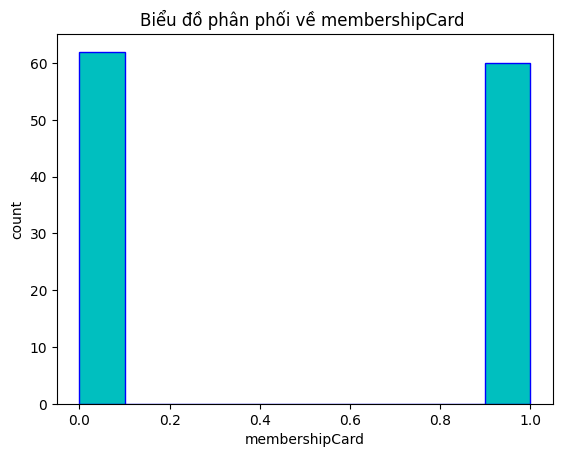

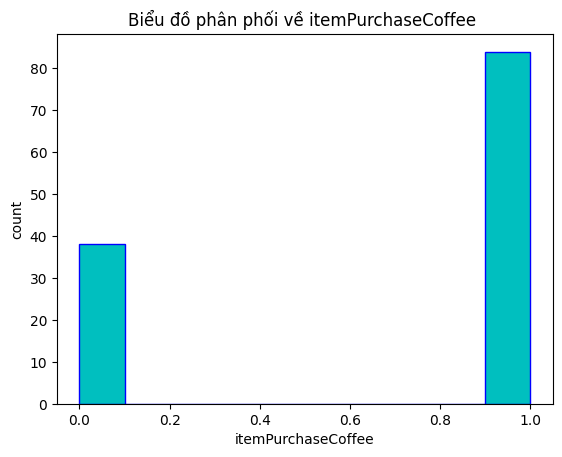

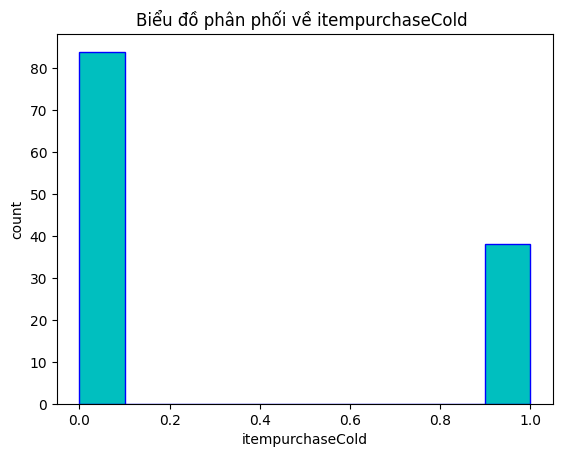

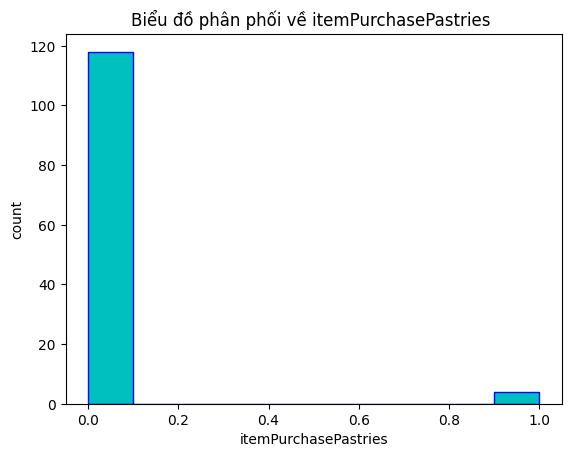

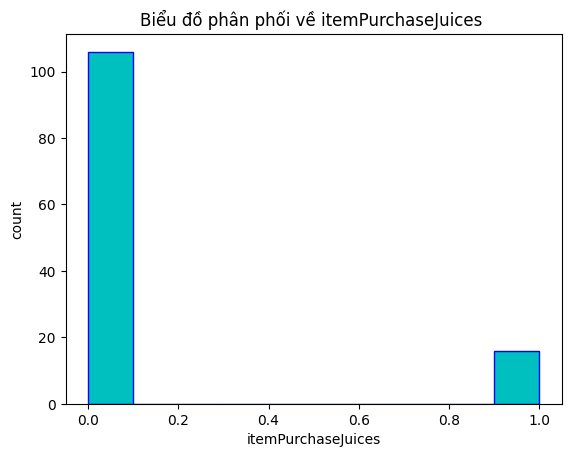

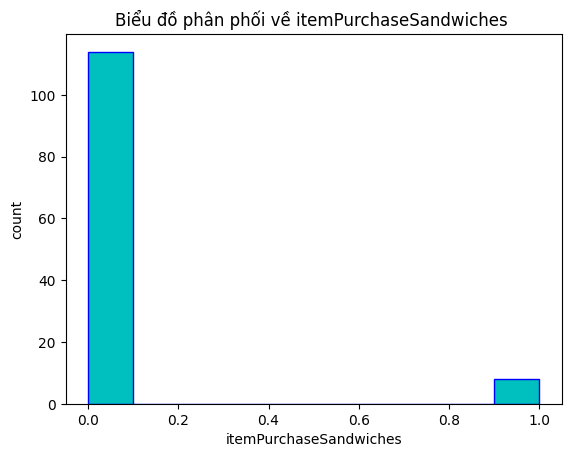

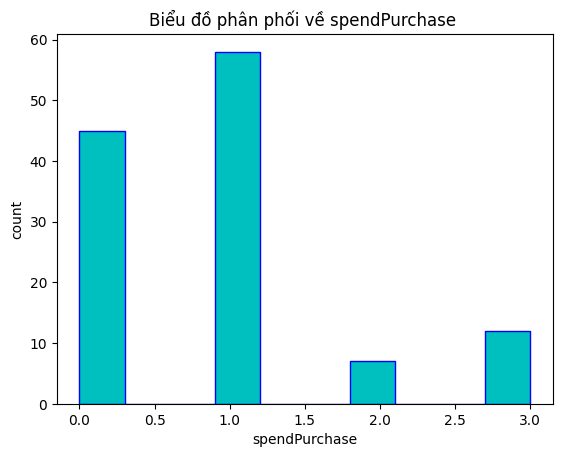

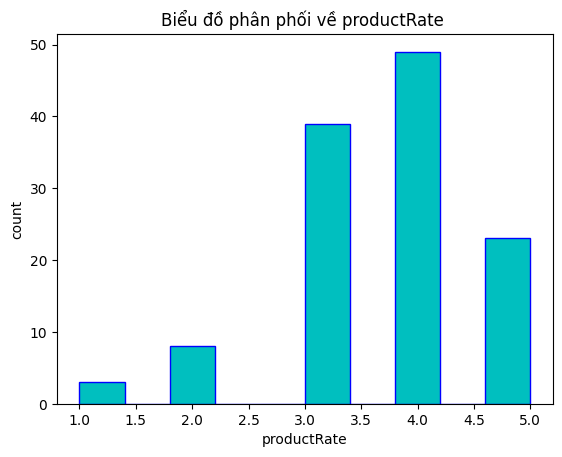

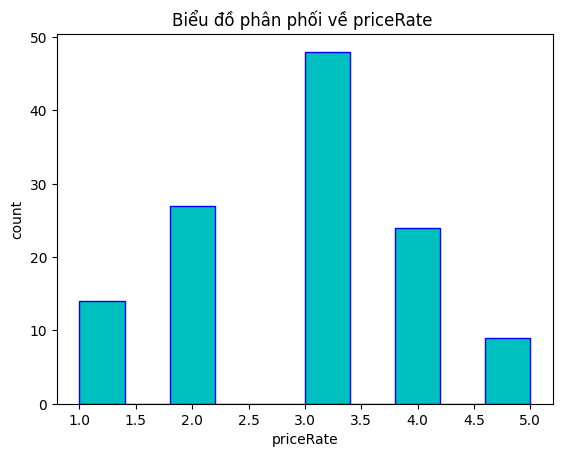

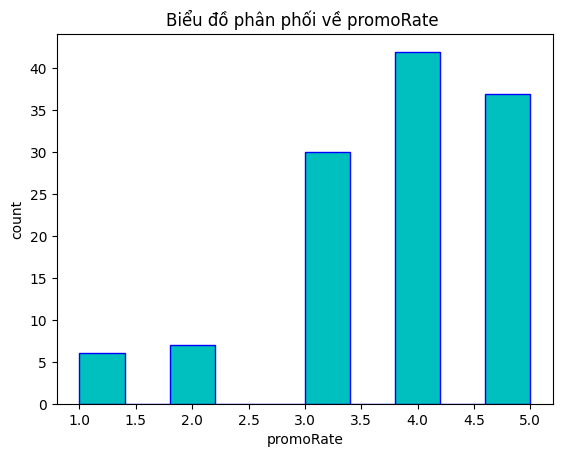

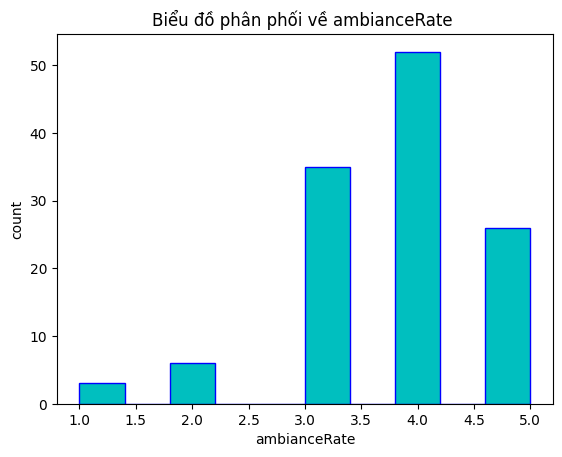

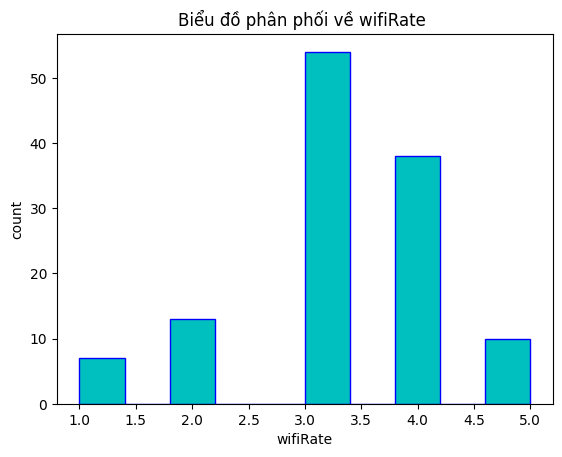

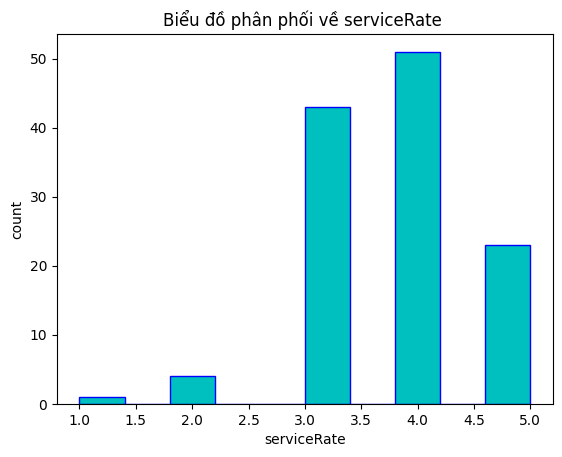

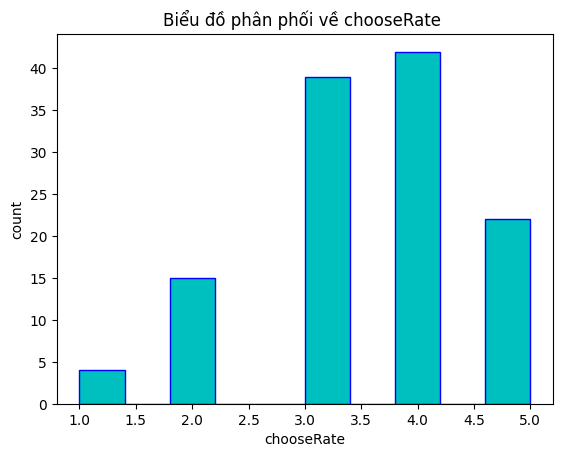

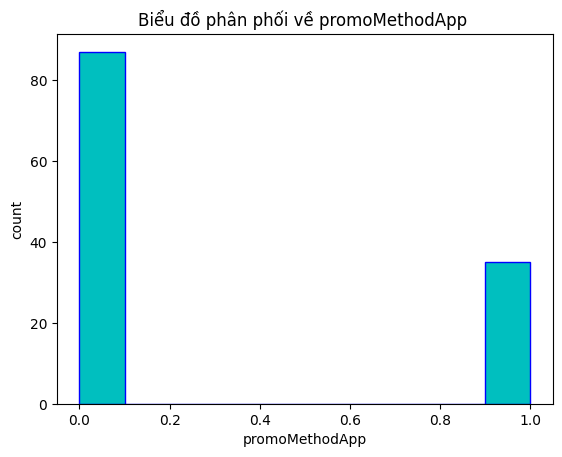

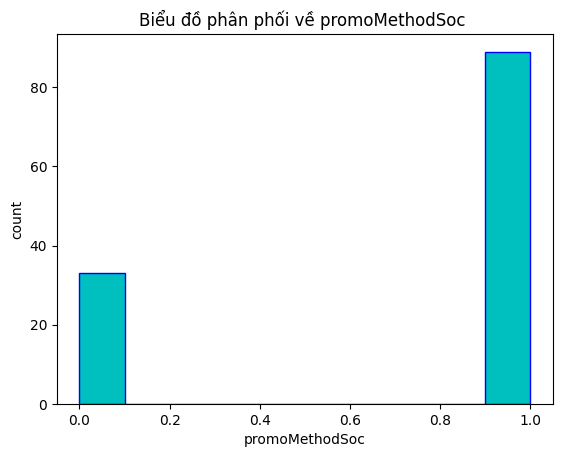

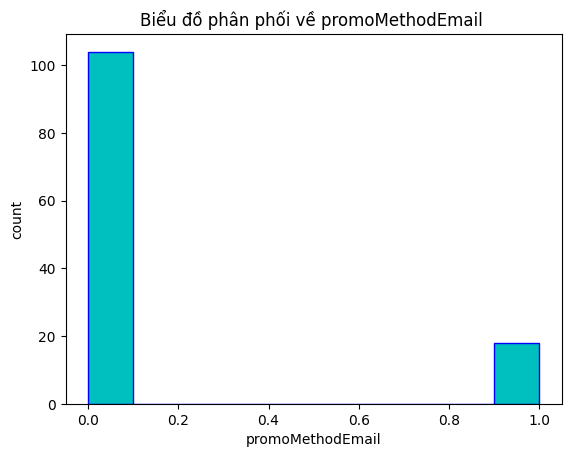

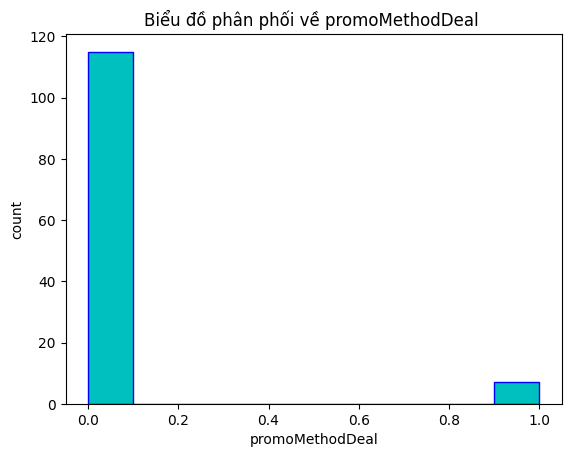

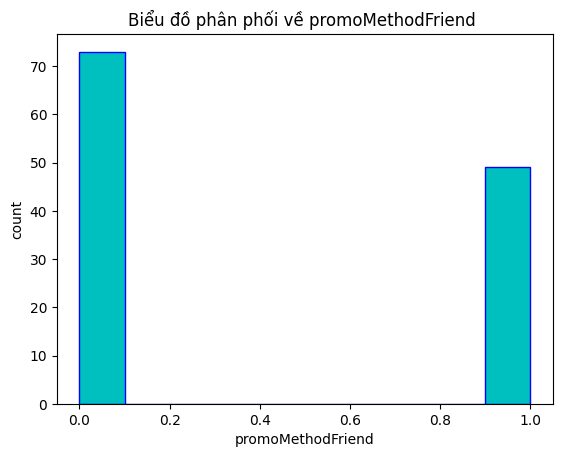

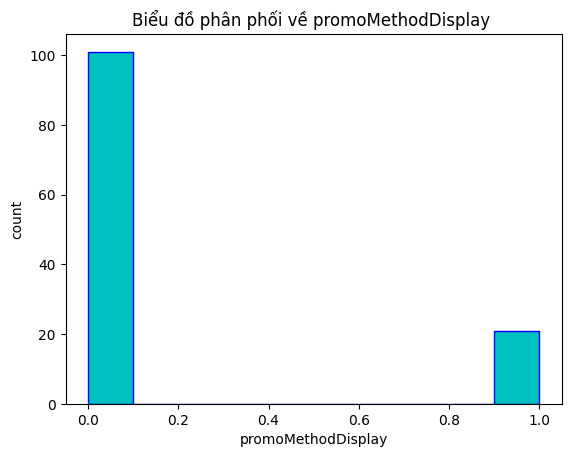

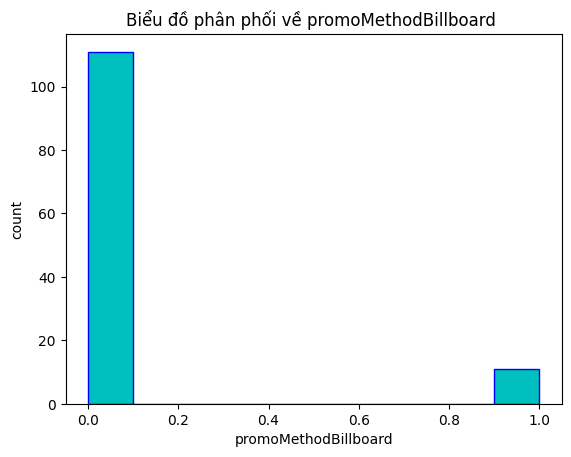

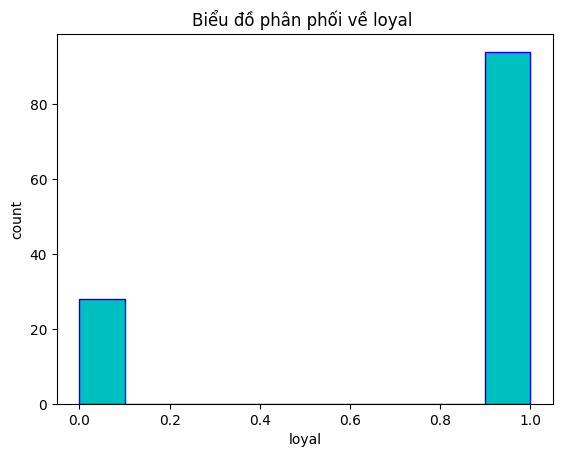

In [ ]:
# hình dáng phân phối
for i in data.columns:
  np.random.seed(1)
  plt.xlabel(i)
  plt.ylabel('count')
  plt.title(f'Biểu đồ phân phối về {i} ')
  plt.hist(data[i], color='c', edgecolor='b')
  plt.show()

*** NHẬN XÉT CHUNG**: Vì mỗi biến feature đề có mức xếp hạng riêng biệt nên phần biểu đồ có sự khác biệt về số lượng cột và đơn vị .



1.   feature gender không có sự chênh lệch giữa 2 giá trị nam và nữ ( 0 : nữ , 1 : nam ) , cụ thể :
* số người nữ là 65 người
* số người nam là 57 người
2.   feature age có sự chênh lệch vượt trội là những người có độ tuổi từ 20 đến 29 tuổi còn lại khá tương đồng nhau, cụ thể :
* số người có độ tuổi dưới 20 tuổi là 13 người
* số người có độ tuổi từ 20 đến 29 tuổi là 85 người
* số người có độ tuổi từ 30 đến 39 tuổi là 17 người
* số người có độ tuổi trên 40 tuổi là 7 người
3.    feature status có sự chênh lệch giữa 2 giá trị học sinh và người làm thuê so với 2 giá trị còn lại , cụ thể :
* số người đang là học sinh  là 42 người
* số người đang là chủ hộ kinh doanh đến 29 tuổi là 17 người
* số người đang là người làm thuê là 61 người
* số người đang là nội trợ là 2 người
4. feature income có sự chênh lệch vượt trội là những người có nguồn thu nhập thấp hơn 25000 RM so với các giá trị còn lại, cụ thể :
* số người có thu nhập dưới 25000 RM là 71 người
* số người có thu nhập từ 25000 đến 50000 RM là 25 người
* số người có thu nhập từ 50000 đến 100000 RM  là 17 người
* số người có thu nhập từ 100000 đến 150000 RM  là 3 người
* số người có thu nhập trên 150000 RM là 6 người
5. feature visitNo có sự chênh lệch vượt trội là những người ghé thăm hàng tháng so với các giá trị còn lại, cụ thể :
* số người hiếm khi ghé thăm là 2 người
* số người ghé thăm hằng ngày là 9 người
* số người ghé thăm mỗi tuần là 26 người
* số người ghé thăm mỗi tháng là 76 người
6. feature method khá tương đồng giữa các giá trị những người ở lại quán ,cầm tay mang đi , lái xe mang đi , cao hơn hẵn các giá trị còn lại , cụ thể :
* số người ở lại quán là 44 người
* số người lái xe mang đi là 20 người  
* số người cầm tay mang đi là 48 người
* số người khác là 1 người   
7. feature timespend có sự giảm dần về thời gian ở lại quán với các mốc thời gian , cụ thể:
* số người có thời gian ở lại quán dưới 30 phút là 73 người
* số người có thời gian ở lại quán từ 30 phút đến 1 giờ là 34 người
* số người có thời gian ở lại quán từ 1 đến 2 giờ là 12 người
* số người có thời gian ở lại quán từ 2 đến 3 giờ là 1 người
* số người có thời gian ở lại quán trên 3 giờ là 2 người
8. feature location có sự tương đồng và tăng dần về khoảng cách đến cửa hàng , cụ thể :
* số người có khoảng cách đến cửa hàng dưới 1km là 27 người
* số người có khoảng cách đến cửa hàng từ 1 đến 3 km là 34 người
* số người có khoảng cách đến cửa hàng trên 3 km là 61 người
9. feature MembershipCard không có sự chênh lệch giữa 2 giá trị ,cụ thể :
* số người có thẻ thành viên là 60 người
* số người không có thẻ thành viên là 62 người
10. feature itemPurchaseCoffee có sự chênh lệch giữa 2 giá trị , cụ thể :
* Số người gọi cà phê là 84 người

* Số người không gọi cà phê là 38 người
11. feature itemPurchaseCold có sự chênh lệch giữa 2 giá trị , cụ thể :
* Số người gọi nước lạnh là 84 người

* Số người không gọi nước lạnh là 38 người
12. feature itemPurchasePastries có sự chênh lệch giữa 2 giá trị , cụ thể :
* Số người gọi bánh ngọt là 4 người

* Số người không gọi bánh ngọt là 118 người
13. feature itemPurchasePastries có sự chênh lệch giữa 2 giá trị , cụ thể :
* Số người gọi nước ép là 16 người

* Số người không gọi nước ép là 106 người
14. feature itemPurchasePastries có sự chênh lệch giữa 2 giá trị , cụ thể :
* Số người gọi bánh mì sandwich là 8 người

* Số người không gọi bánh mì sandwich là 114 người

15. feature SpendPurchase có sự chênh lệch giữa 2 giá trị (dưới 20RM và từ 20 đến 40 RM ) so với 2 giá trị còn lại , cụ thể :
* số người đến cửa hàng và không chi trả thứ gì là 7 người
* số người đến cửa hàng và chi số tiền dưới 20 RM là 58 người
* số người đến cửa hàng và chi số tiền từ 20 đến 40 RM là 45 người
* số người đến cửa hàng và chi số tiền trên 40 RM là 12 người
16. feature productRate có sự đánh giá của khách hàng tập trung ở mức bình thường , tốt , rất tốt , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 3 người
* số người đánh giá chất lượng sản phẩm tệ là 8 người
* số người đánh giá chất lượng sản phẩm bình thường là 39 người
* số người đánh giá chất lượng sản phẩm tốt là 49 người
* số người đánh giá chất lượng sản phẩm rất tốt là 23 người
17. feature priceRate có sự đánh giá của khách hàng tập trung ở mức tệ, bình thường , tốt  , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 14 người
* số người đánh giá chất lượng sản phẩm tệ là 27 người
* số người đánh giá chất lượng sản phẩm bình thường là 48 người
* số người đánh giá chất lượng sản phẩm tốt là 24 người
* số người đánh giá chất lượng sản phẩm rất tốt là 9 người
18. feature promoRate có sự đánh giá của khách hàng tập trung ở mức tệ, bình thường , tốt  , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 6 người
* số người đánh giá chất lượng sản phẩm tệ là 7 người
* số người đánh giá chất lượng sản phẩm bình thường là 30 người
* số người đánh giá chất lượng sản phẩm tốt là 42 người
* số người đánh giá chất lượng sản phẩm rất tốt là 37 người
19. feature amnianceRate có sự đánh giá của khách hàng tập trung ở mức tệ, bình thường , tốt  , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 3 người
* số người đánh giá chất lượng sản phẩm tệ là 6 người
* số người đánh giá chất lượng sản phẩm bình thường là 35 người
* số người đánh giá chất lượng sản phẩm tốt là 52 người
* số người đánh giá chất lượng sản phẩm rất tốt là 26 người
20. feature wifiRate có sự đánh giá của khách hàng tập trung ở mức bình thường , tốt  , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 7 người
* số người đánh giá chất lượng sản phẩm tệ là 13 người
* số người đánh giá chất lượng sản phẩm bình thường là 54 người
* số người đánh giá chất lượng sản phẩm tốt là 38 người
* số người đánh giá chất lượng sản phẩm rất tốt là 10 người
21. feature serviceRate có sự đánh giá của khách hàng tập trung ở mức bình thường , tốt , rất tốt , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 1 người
* số người đánh giá chất lượng sản phẩm tệ là 4 người
* số người đánh giá chất lượng sản phẩm bình thường là 43 người
* số người đánh giá chất lượng sản phẩm tốt là 51 người
* số người đánh giá chất lượng sản phẩm rất tốt là 23 người
22. feature chooseRate có sự đánh giá của khách hàng tập trung ở mức bình thường , tốt , rất tốt , cụ thể :
* số người đánh giá chất lượng sản phẩm rất tệ là 4 người
* số người đánh giá chất lượng sản phẩm tệ là 15 người
* số người đánh giá chất lượng sản phẩm bình thường là 39 người
* số người đánh giá chất lượng sản phẩm tốt là 42 người
* số người đánh giá chất lượng sản phẩm rất tốt là 22 người
23. feature promoMethodApp có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 35 người
* số người không quan tâm là 87 người
24. feature promoMethodSoc có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 33 người
* số người không quan tâm là 89 người
25. feature promoMethodEmail có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 18 người
* số người không quan tâm là 104 người
25. feature promoMethodDeal có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 7 người
* số người không quan tâm là 115 người
26. feature promoMethodFriend có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 49 người
* số người không quan tâm là 73 người
27. feature promoMethodDisplay có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 21 người
* số người không quan tâm là 101 người
28. feature promoMethodBillboard có sự chênh lệch giữa 2 giá trị , cụ thể :
* số người quan tâm là 11 người
* số người không quan tâm là 111 người
29. feature loyal không có sự chênh lệch giữa 2 giá trị ,cụ thể :
* số người trung thành với cửa hàng là 94 người
* số người không trung thành với cửa hàng là 28 người



## **Tương Quan**

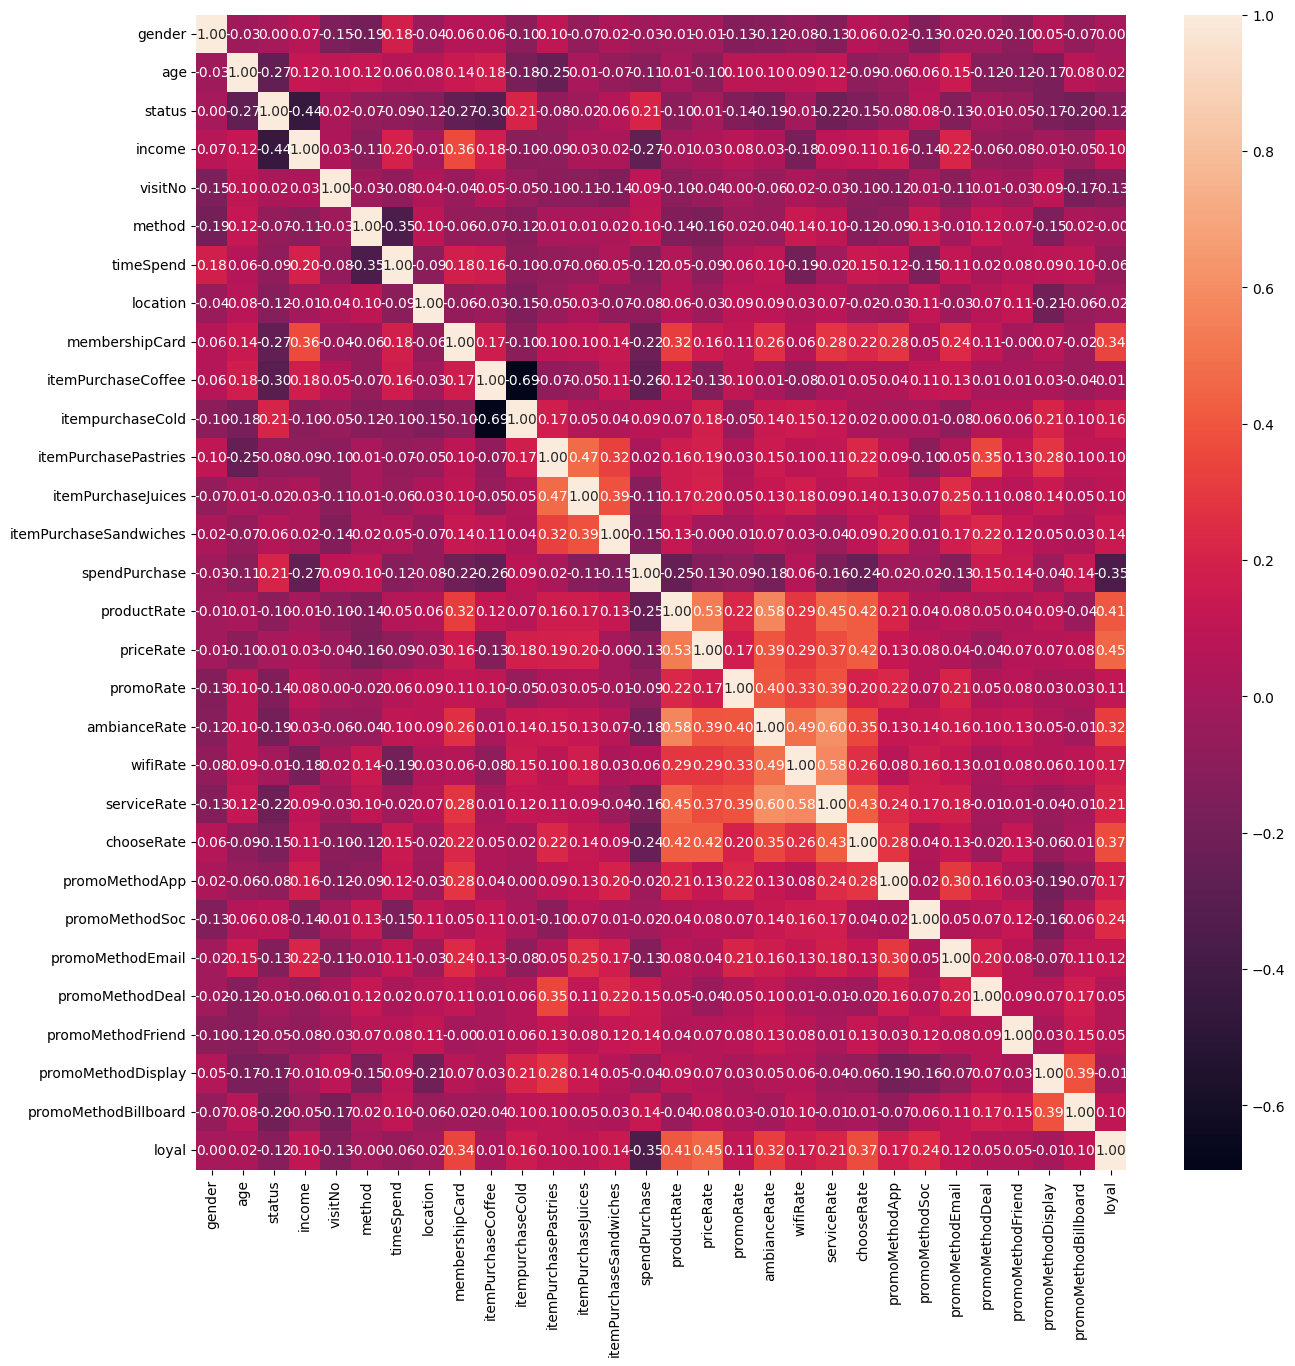

In [ ]:
# Biểu đồ tương quan giữa các feature

lst = data.columns.tolist()
plt.subplots(figsize=(15,15))
sbn.heatmap(data[lst].corr(), annot = True, fmt = ".2f")
plt.show()

*** Nhận Xét**: Nhìn vào biểu đồ ta thấy


1.   Đa số các feature không tương quan nhau hoặc nếu có thì chỉ số tương quan rất bé ~ 0
2.   Một số cặp feature tương quan nghịch như :
  *   feature itemPurchaseCold và feature itemPurchaseCoffee ~ -0.69

3.   Một số cặp feature tương quan thuận như :  
  *   feature priceRate và feature productRate ~ 0.53
  *   feature ambianceRate và feature productRate ~ 0.58
  *   feature serviceRate và feature ambianceRate ~ 0.6
  *   feature serviceRate và feature wifiRate ~ 0.58





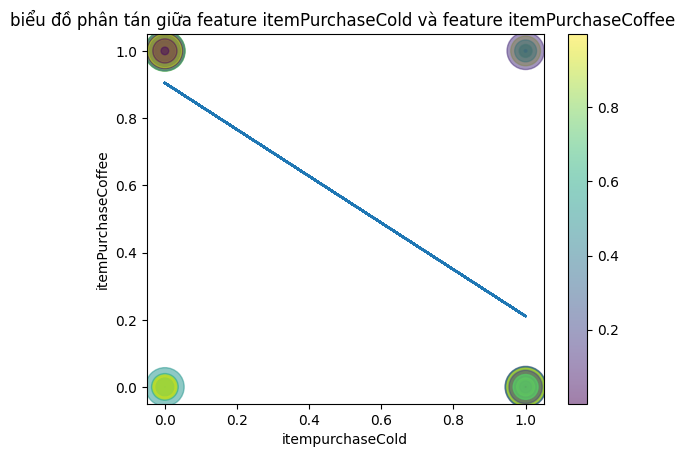

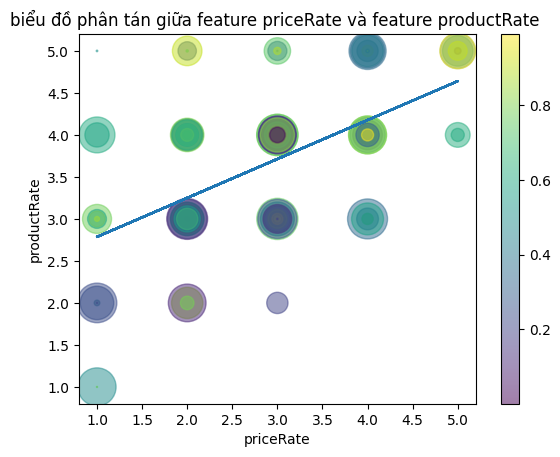

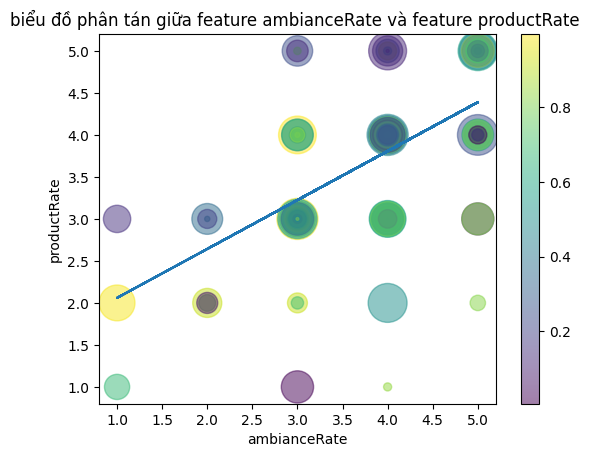

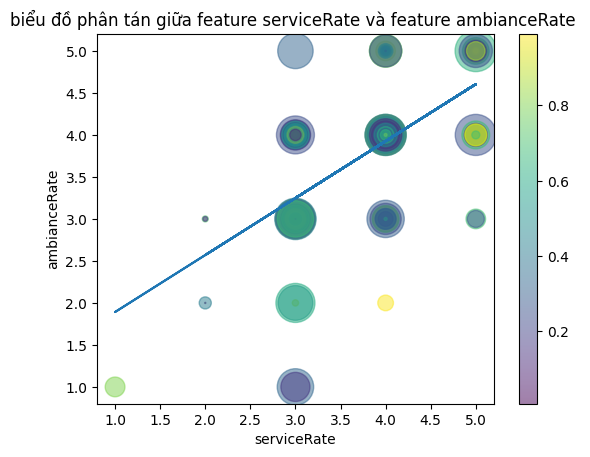

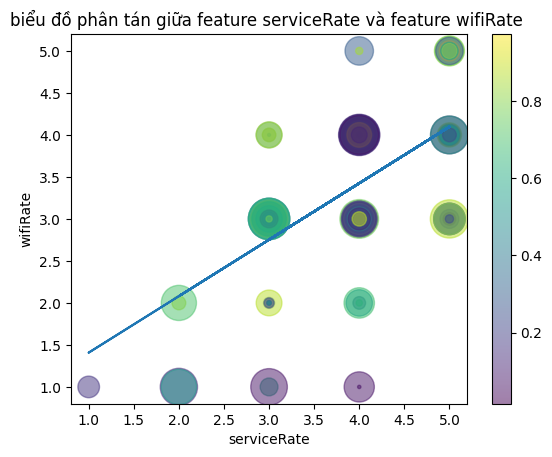

In [ ]:
## Biểu diễn các cặp tương quan với biểu đồ Scatterplot

# Tương quan nghịch giữa feature itemPurchaseCold và feature itemPurchaseCoffee
N = len(data['itempurchaseCold'])
x = data['itempurchaseCold']
y = data['itemPurchaseCoffee']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.xlabel('itempurchaseCold')
plt.ylabel('itemPurchaseCoffee')
plt.title('biểu đồ phân tán giữa feature itemPurchaseCold và feature itemPurchaseCoffee ')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.colorbar()
plt.show()

# Tương quan thuận giữa feature priceRate và feature productRate

x = data['priceRate']
y = data['productRate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.xlabel('priceRate')
plt.ylabel('productRate')
plt.title('biểu đồ phân tán giữa feature priceRate và feature productRate ')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.colorbar()
plt.show()

# Tương quan thuận giữa feature ambianceRate và feature productRate

x = data['ambianceRate']
y = data['productRate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.xlabel('ambianceRate')
plt.ylabel('productRate')
plt.title('biểu đồ phân tán giữa feature ambianceRate và feature productRate ')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.colorbar()
plt.show()

# Tương quan thuận giữa feature serviceRate và feature ambianceRate

x = data['serviceRate']
y = data['ambianceRate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.xlabel('serviceRate')
plt.ylabel('ambianceRate')
plt.title('biểu đồ phân tán giữa feature serviceRate và feature ambianceRate ')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.colorbar()
plt.show()

# Tương quan thuận giữa feature serviceRate và feature wifiRate

x = data['serviceRate']
y = data['wifiRate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.xlabel('serviceRate')
plt.ylabel('wifiRate')
plt.title('biểu đồ phân tán giữa feature serviceRate và feature wifiRate ')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.colorbar()
plt.show()


# **BIỂU ĐỒ**

## Nhơn

### **Mức độ trung thành của từng độ tuổi ứng với từng mức thu nhập**

In [ ]:
df=pd.DataFrame(data[['age','income','loyal']])
fig = px.parallel_categories(df,color = 'income', dimensions=['age', 'income', 'loyal'],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2,
                             title=' Biểu đồ thể hiện mức độ trung thành của từng độ tuổi ứng với từng mức thu nhập'
                )
fig.show()

**Nhận Xét:**

Tùy theo từng độ khoảng thu nhập và độ tuổi khác nhau mà dẫn đến sự trung thành đối với của hàng cũng khác nhau :


*   Đối với mức độ tuổi 0 ( dưới 20 tuổi )

     - Tất cả đểu ở mức thu nhập dưới 25000 RM và có đến 2/3 là khách hàng trung thành , chỉ 1/3 là khách hàng không trung thành



*   Đối với mức độ tuổi 3 ( trên 40 tuổi )
    - Mức thu nhập của khách hàng trải khắp các khoảng và có đến 6/7 là khách hàng trung thành  , chỉ 1/7 là khách hang không trung thành


*   Đối với mức độ tuổi 2 ( từ 30 đến 40 tuổi )
    - Có 1/3 số khách hàng thuộc mức thu nhập dưới 25000 RM , 1/3 số khách hàng thuộc mức thu nhập từ 50000 đến 100000 RM , 1/3 số khách hàng có mức thu nhập trải khắp các mức còn lại
    - Đa số đêu là khách hàng trung thành ,
tỉ lệ khách hàng trung thành chiếm ~ 90%


*   Đối với mức độ tuổi 1 ( từ 20 đến 29 tuổi )
     
     - Mức thu nhập dưới 25000 RM có tỉ lệ giữa khách hàng trung thành và khách hàng không trung thành là 3:1
     - Mức thu nhập từ 25000 đến 50000 RM có tỉ lệ giữa khách hàng trung thành và khách hàng không trung thành là 6:1
     - Mức thu nhập từ 50000 đến 100000 RM có tỉ lệ giữa khách hàng trung thành và khách hàng không trung thành là xấp xỉ 5:1
     - Mức thu nhập trên 150000 RM có 100% đều là khách hàng trung thành

### **Mức độ ảnh hưởng của wifi đối với nhận định chất lượng dịch vụ .**

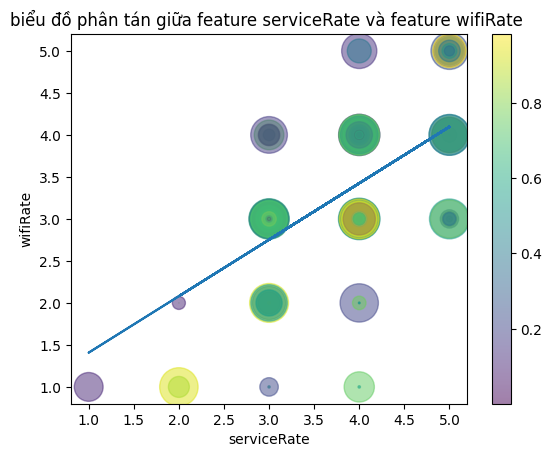

In [ ]:
x = data['serviceRate']
y = data['wifiRate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.xlabel('serviceRate')
plt.ylabel('wifiRate')
plt.title('biểu đồ phân tán giữa feature serviceRate và feature wifiRate ')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.colorbar()
plt.show()

**Nhận Xét:**


  Với đường hồi quy tuyến tính như hình ta có thể kết luận 2 thuộc tính wifiRate và serviceRate có mỗi tương quan thuận.

  Với mỗi điểm có các lớp màu khác nhau , xét cặp số (wifiRate;serviceRate) :


*   Các mức xuất hiện chỉ số tương đồng  rất cao (màu vàng) : (2;3) , (4;3) , (2;4) , (3;4)  
*   Các mức xuất hiện chỉ số tương đồng cao (màu xanh) : (3;3) , (4;4) , (4;5)
*   Các điểm còn lại điểm tương đồng không cao

  *Kết luận* : Cho thấy nếu chất lượng wifi đảm bảo tốt thì cửa hàng sẽ dễ nhận được đánh giá tốt về mặt dịch vụ và ngược lại.



### **Biểu đồ thể hiện mức độ chi trả tiền của người những người thường xuyên đến cửa hàng**

In [ ]:
# 'Biểu đồ thể hiện mức độ chi trả tiền của người những người thường xuyên đến cửa hàng  '
df=pd.DataFrame(data[['visitNo','spendPurchase']])
dfgb=df.groupby(by=['visitNo','spendPurchase'])
s=dfgb.size()
df_gb=s.reset_index(name='counts')
print(df_gb)


    visitNo  spendPurchase  counts
0         0              0       2
1         1              0      16
2         1              1       8
3         1              2       2
4         2              1       2
5         2              3       7
6         3              0      21
7         3              1      47
8         3              2       3
9         3              3       5
10        4              0       6
11        4              1       1
12        4              2       2


In [ ]:
fig = px.bar(df_gb, x="visitNo", y="counts",
             color="spendPurchase",barmode='group'
             ,title='Biểu đồ thể hiện mức độ chi trả tiền của người những người thường xuyên đến cửa hàng'
             ,text_auto=True
             )
fig.show()

**Nhận Xét**



1.   Toàn bộ những người hiếm khi đến cửa hàng sẽ chi từ 20 đến 40 RM

2.   Với những người ghé thăm mỗi ngày , phần lớn chi mua từ 20 đến 40 RM:


*   Phần lớn chi từ 20 đến 40 RM chiếm xấp xỉ 66.7%
*   Số khác chi từ hơn 40 RM chiếm xấp xỉ 22.2%
*   Còn lại chi dưới 20 RM chiếm xấp xỉ 11.1%

3.   Với những người ghé thăm mỗi tuần ,
phần lớn chi mua từ 20 đến 40 RM :

*   Phần lớn từ 20 đến 40RM chiếm xấp xỉ 61.5%
*   Số khách chi dưới 20 RM chiếm xấp xỉ 30.8%
*   Còn lại chi trên 40RM chiếm xấp xỉ 7.7%

4. Với những người đến thăm mỗi tháng ,
phần lớn chi mua dưới 20 RM:

*   Phần lớn chi dưới 20 RM chiếm xấp xỉ 61.8%
*   Số khác chi từ 20 đến 40 RM chiếm xấp xỉ 27.6%
*   Đặc biệt không chi mua bất cứ thứ gì chiếm xấp xỉ 6.6%
*   Còn lại chi trên 40 RM chiếm xấp xỉ 4%

*Kết luận :* Những người có tần suất ghé thăm cửa hàng càng lớn sẽ chi mức tiền vừa phải ; còn những người có tần suất ghé thăm cửa hàng càng ít sẽ chi mức tiền ít hơn riêng trường hợp hiếm khi ghé thăm cửa hàng , khách hàng thường có xu hướng chi số tiền tầm trung như những người ghé thăm cửa hàng tần suất cao .

## Cẩm Nhung

### **Service Rate of different Age groups**

In [ ]:
servicerate_crosstab=pd.crosstab(data['age'], data['serviceRate'], normalize='index')
servicerate_crosstab=servicerate_crosstab.rename(index={0:'40 and above',1:'Below 20',2:'From 20 to 29',3:'From 30 to 39'})
servicerate_crosstab

serviceRate,1,2,3,4,5
age,,,,,
40 and above,0.000000,0.000000,0.428571,0.428571,0.142857
Below 20,0.000000,0.076923,0.538462,0.230769,0.153846
From 20 to 29,0.011765,0.035294,0.329412,0.447059,0.176471
From 30 to 39,0.000000,0.000000,0.294118,0.411765,0.294118


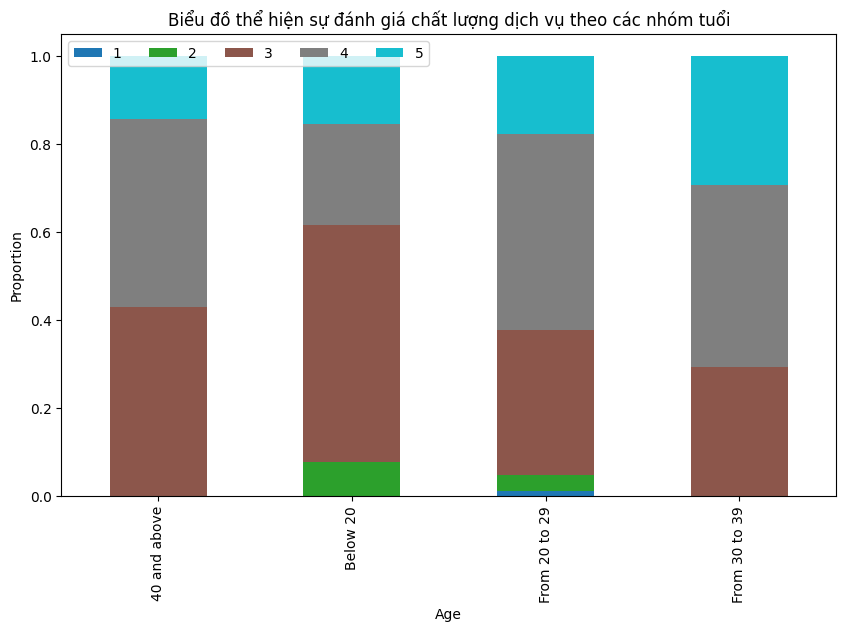

In [ ]:
servicerate_crosstab.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=5)
plt.xlabel("Age")
plt.ylabel("Proportion")
plt.title("Biểu đồ thể hiện sự đánh giá chất lượng dịch vụ theo các nhóm tuổi")

plt.show()

### **Quality Rates Analysis**

In [ ]:
data = data.reset_index()
def plot_bar(feature):
    plot_data = organize_plot_data(feature)
    generate_plot(plot_data,feature)

def organize_plot_data(feature):
    plot_data = data[['index',feature]]
    plot_data = plot_data.groupby(feature).count()
    plot_data = plot_data.reset_index()
    plot_data.columns = [feature,'Counts']
    return plot_data

def generate_plot(plot_data,feature):
    plt.bar(x = plot_data[feature], height = plot_data['Counts'])
    plt.title('Đánh giá về {}'.format(feature))

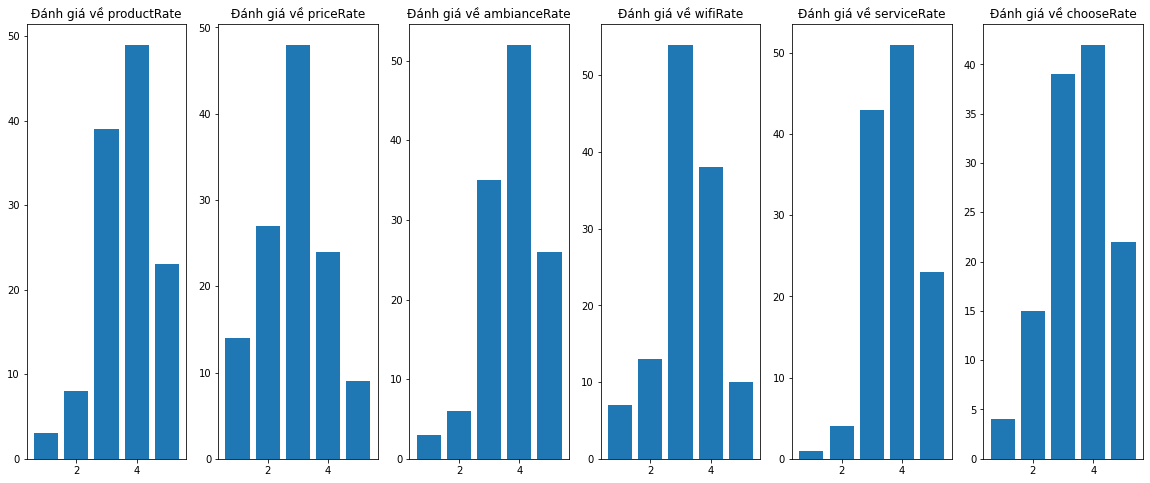

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,6,1)
plot_bar(feature='productRate')
plt.subplot(1,6,2)
plot_bar(feature ='priceRate')
plt.subplot(1,6,3)
plot_bar(feature ='ambianceRate')
plt.subplot(1,6,4)
plot_bar(feature ='wifiRate')
plt.subplot(1,6,5)
plot_bar(feature ='serviceRate')
plt.subplot(1,6,6)
plot_bar(feature ='chooseRate')

### **Biểu đồ Boxplot (vị trí phân bổ dữ liệu)**

In [ ]:
data[["priceRate","spendPurchase"]].groupby("priceRate").describe()

spendPurchase                                             
                  count      mean       std  min  25%  50%  75%  max
priceRate                                                           
1                  14.0  1.571429  1.222500  0.0  1.0  1.0  3.0  3.0
2                  27.0  0.888889  0.751068  0.0  0.5  1.0  1.0  3.0
3                  48.0  0.687500  0.878980  0.0  0.0  0.5  1.0  3.0
4                  24.0  0.708333  0.624094  0.0  0.0  1.0  1.0  2.0
5                   9.0  1.333333  1.000000  0.0  1.0  1.0  2.0  3.0

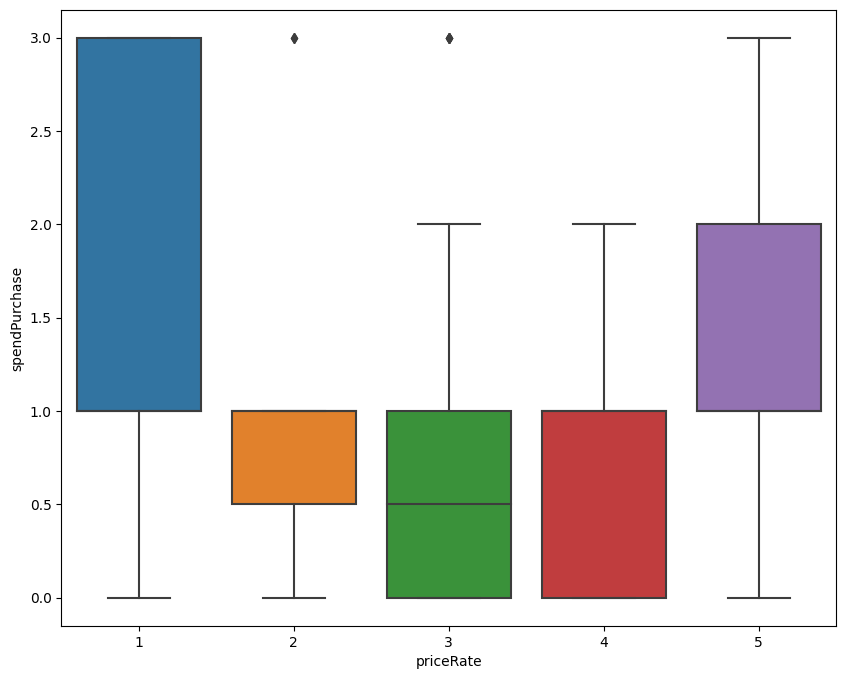

In [ ]:
plt.figure(figsize=(10,8))
sbn.boxplot(x="priceRate",y="spendPurchase",data=data)
plt.show();

## Tuyết Nhung

### **Tỷ lệ thời gian khách hàng ở lại quán so với sự hài lòng về Starbucks**

,loyal
timeSpend,
0,56
1,11
2,1
3,26


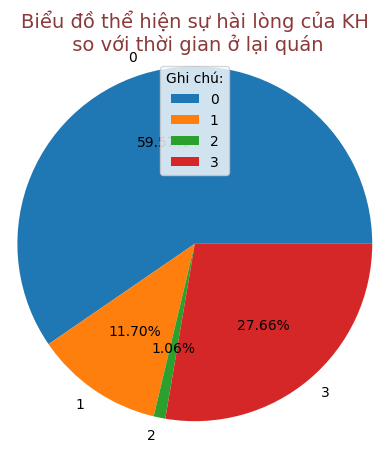

In [ ]:
# Số lượng khách hàng hài lòng về Starbucks so với thời gian khách hàng ở lại quán
df = data[data['loyal']==1].groupby('timeSpend')['loyal'].count().to_frame()
display(df)

# Biểu diễn dưới dạng biểu đồ
plt.pie(df['loyal'], labels=df.index, autopct='%1.2f%%', radius=1.2)
plt.title('Biểu đồ thể hiện sự hài lòng của KH\n so với thời gian ở lại quán'
          , color='#8B3A3A',fontsize=14)
plt.legend(title='Ghi chú:')
plt.show()

,loyal
timeSpend,
0,17
1,1
3,8
4,2


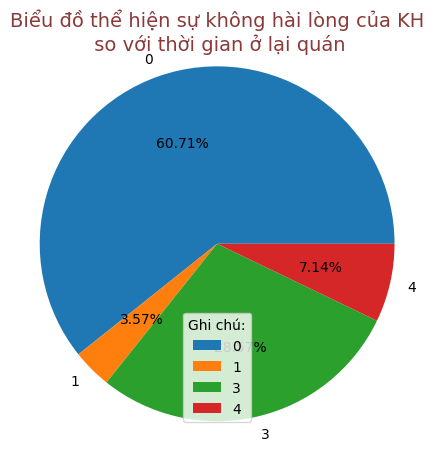

In [ ]:
# Số lượng khách hàng không hài lòng về Starbucks so với thời gian khách hàng ở lại quán
df1 = data[data['loyal']==0].groupby('timeSpend')['loyal'].count().to_frame()
display(df1)

# Biểu diễn dưới dạng biểu đồ
plt.pie(df1['loyal'], labels=df1.index, autopct='%1.2f%%', radius=1.2)
plt.title('Biểu đồ thể hiện sự không hài lòng của KH\n so với thời gian ở lại quán'
          , color='#8B3A3A', fontsize=14)
plt.legend(title='Ghi chú:')
plt.show()

**Nhận xét:**
- Dựa vào 2 bảng số thể hiện số lượng khách hàng đánh giá về Starbucks theo thời gian ở lại quán (biến timeSpend) thì ta thấy số lượng khách đánh giá không hài lòng (số lượng: 28) ít hơn là khách hài lòng (số lượng: 94) về quán (94 > 28), như vậy ta có thể cho rằng Starbuck rất được mọi người yêu thích.
- Dựa vào 2 biểu đồ trên, thì ta thấy được mặc dù khách hàng đánh giá hài lòng hay không hài lòng về Starbucks vì số lượng khách ở lại quán dưới 1 gờ đều chiếm số lượng lớn (lớn hơn 50% trên tổng thể). Điều này cho thấy khách hàng không ngồi ở lại quán và có thể hình thức mua nước tại quán là mang về.
- Từ hai nhận xét trên thì ta có thể cho rằng thời gian ở lại quán không ảnh hưởng nhiều đến với sự đánh giá mức độ hài lòng của khách hàng. Dù cho số lượng khách có hài lòng về quán chiếm số lượng nhiều nhất.


In [ ]:
r, pvalue = stats.pearsonr(data['timeSpend'], data['loyal'])
print(f'Hệ số tương quan = {r:.4f}, p_values = {pvalue:.4f}')

Hệ số tương quan = -0.0648, p_values = 0.4786


**Nhận xét:**
- Giả thiết kiểm định của ta là:
     
       H0: 2 biến không tương quan với nhau
- Ta thấy trị số p value rất cao (xấp xỉ 28%) nên không bác bỏ H0, và hai biến này không tương quan với nhau
- Và hệ số tương quan xấp xỉ 0.1 nên hai biến có tương quan thấp
- Từ đó, ta kết luận rằng hai biến loyal và biến timeSpend không tương quan với nhau.

### **Tỷ lệ khách hàng ở lại quán so với phương thức mua nước tại Starbucks**

In [ ]:
df3 = data[data['loyal']==0].groupby(['method','timeSpend'])['loyal'].count().to_frame()
df3 = df3.reset_index()
df3

,method,timeSpend,loyal
0,0,0,4
1,0,1,1
2,0,3,6
3,0,4,1
4,1,0,1
5,1,3,1
6,1,4,1
7,4,0,1
8,5,0,1
9,6,0,8


In [ ]:
fig = px.parallel_categories(data,
                             dimensions=['method', 'timeSpend'],
                             color = 'method', color_continuous_scale="agsunset",
                             title='Biểu đồ thể hiện tỷ lệ của KH hài lòng về quán của cách thức mua nước và thời gian ở lại quán')
fig.show()

**Nhận xét:**
- Từ biểu đồ trên, thời gian ở lại bao gồm 0, 1, 2, 3 được chia ra rất đều nhau theo các phương thức mua nước ở quán. Ta thấy timeSpend = 3 tức là thời gian ở lại quán là từ 2 đến 3 tiếng với phương thức là uống ở tại quán (Dine In) rất đúng.
- Còn khách hàng ở lại không quá 2 giờ thì được chia đều cho các phương thức tùy chọn của khách hàng.
- Dựa vào bảng dữ liệu và biểu đồ, ta còn thấy được đối với method = 2 (tức là KH mua nước mang đi) và timeSpend = 0 (tức là ở lại không quá 30 phút), từ điều đó cho thấy rất hợp lệ. Và có thể hai biến này có tương quan với nhau?

In [ ]:
r, pvalue = stats.pearsonr(data['timeSpend'], data['method'])
print(f'Hệ số tương quan = {r:.4f}, p_values = {pvalue:.4f}')

Hệ số tương quan = -0.3520, p_values = 0.0001


**Nhận xét:**
- Từ trị số p value rất nhỏ ta bác bỏ H0: hai biến không tương quan với nhau
- Suy ra, hai biến này tương quan với nhau

##Thanh

### **Tuổi**

In [ ]:
data_age = pd.DataFrame(index=[0,1,2,3])
data_gb1 = data.groupby ('age')['age'].count()
data_age['Age'] = data_gb1

In [ ]:
data_age.sort_values(by = ['Age'], inplace = True)
display(data_age)

,Age
0,7
1,13
3,17
2,85


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=data_age.index, y=data_age['Age'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100]
    )
)])
fig.update_xaxes(title_text="Age Group")
fig.update_yaxes(title_text="Number of Customers")
fig.update_layout(title_text='Biểu đồ thể hiện số lượng khách hàng của từng nhóm tuổi', title_x=0.5
                  )
fig.show()

**Nhận Xét**

Age:
  * 0: 40 and above
  * 1: Below 20
  * 2: From 20 to 29
  * 3: From 30 to 39

Nhìn vào biểu đồ có thể thấy, phần lớn khách hàng đến cửa hàng nằm trong khoảng độ tuổi 20 đến 29 (79/113). Đây là độ tuổi lao động, thích khám phá và có nhu cầu cao về thể hiện giá trị bản thân, thế nên thương hiệu có danh tiếng là nơi thu hút họ đến và trải nghiệm. Trong khi đó, độ tuổi từ 40 trở lên chiếm số ít trong nhóm khách hàng, chỉ có 7/113 là thuộc nhóm tuổi này.

### **location + visit frequency**

In [ ]:
fig = px.sunburst(data,
                  path=["location","visitNo"]
                  )
fig.update_layout(title_text='Biểu đồ thể hiện tỷ lệ mức độ ghé thăm cửa hàng theo từng nhóm khoảng cách', title_x=0.5)
fig.show()

**Nhận xét**
* Vòng tròn bên trong thể hiện tỷ lệ giữa các mức độ ghé thăm cửa hàng
  * 0: Daily
  * 1: Monthly
  * 2: Never
  * 3: Rarely
  * 4: Weekly
* Vòng tròn bên ngoài thể hiện tỷ lệ giữa các nhóm khoảng cách từ vị trí khách hàng đến cửa hàng gần nhất, tương ứng với từng mức độ ghé thăm cửa hàng:
  * 0: Within 1km
  * 1: 1km to 3km
  * 2: More than 3km

* Có thể thấy trong nhóm khách hàng tham gia khảo sát, hơn 50% khách hàng không thường xuyên ghé cửa hàng, họ chỉ đến hàng tháng - mức độ ghé cửa hàng ít nhất. Khi tìm hiểu về khoảng cách địa lý, yếu tố này không ảnh hưởng đến tần suất đến cửa hàng của nhóm những người chỉ ghé 1 lần/tháng này, vì tỷ lệ giữa 3 mức khoảng cách là như nhau.
* Đối với nhóm khách hàng ghé cửa hàng 1 lần/tuần, hơn 1 nửa trong nhóm này cho biết khoảng cách từ vị trí của họ (nhà/nơi làm việc/...) đến cửa hàng gần nhất là trên 3km, 1 khoảng cách khá lớn và tốn nhiều thời gian di chuyển.
* Là 1 cửa hàng nổi tiếng và có mức giá cao, vì thể tỷ lệ khách hàng trung thành ghé cửa hàng hằng ngày là không cao. Trong mẫu khảo sát này, chỉ có 9/113 người ghé cửa hàng mỗi ngày, phần lớn là những người ở gần cửa hàng (dưới 3km) (7/9 người thuộc nhóm này).

### **các tiêu chí đánh giá thang điểm 1-5**

In [ ]:
col = list(data.columns)
col

['index',
 'gender',
 'age',
 'status',
 'income',
 'visitNo',
 'method',
 'timeSpend',
 'location',
 'membershipCard',
 'itemPurchaseCoffee',
 'itempurchaseCold',
 'itemPurchasePastries',
 'itemPurchaseJuices',
 'itemPurchaseSandwiches',
 'spendPurchase',
 'productRate',
 'priceRate',
 'promoRate',
 'ambianceRate',
 'wifiRate',
 'serviceRate',
 'chooseRate',
 'promoMethodApp',
 'promoMethodSoc',
 'promoMethodEmail',
 'promoMethodDeal',
 'promoMethodFriend',
 'promoMethodDisplay',
 'promoMethodBillboard',
 'loyal']

In [ ]:
data_rate = pd.DataFrame(index=[1,2,3,4,5])
for i in range (col.index('productRate'), col.index('chooseRate')):
  data_gb = data.groupby (by = [col[i]])[col[i]].count()
  data_rate[col[i]] = data_gb
display(data_rate)

,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate
1,3,14,6,3,7,1
2,8,27,7,6,13,4
3,39,48,30,35,54,43
4,49,24,42,52,38,51
5,23,9,37,26,10,23


In [ ]:
data_rate = data_rate.fillna(0)

In [ ]:
col2 = list(data_rate.columns)
for i in col2:
  if type(data_rate[i]) != 'int64':
    data_rate[i] = data_rate[i].astype('int64')

In [ ]:
data_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   productRate   5 non-null      int64
 1   priceRate     5 non-null      int64
 2   promoRate     5 non-null      int64
 3   ambianceRate  5 non-null      int64
 4   wifiRate      5 non-null      int64
 5   serviceRate   5 non-null      int64
dtypes: int64(6)
memory usage: 280.0 bytes


In [ ]:
import plotly.graph_objects as go
x = data_rate.index

fig = go.Figure()
for i in range (0,6):
  fig.add_trace(go.Bar(x=x, y = data_rate[col2[i]], name = col2[i]))

fig.update_layout(barmode='stack', title_text='Biểu đồ thể hiện số lượt đánh giá các tiêu chí theo từng thang điểm từ 1-5', title_x=0.5,
                  xaxis=dict(title='Rate point', titlefont_size=16, tickfont_size=14),
                  yaxis=dict(title='Number of votes',
                             titlefont_size=14,
                             tickfont_size=10)
)
fig.show()

**Nhận Xét**
* Là một cửa hàng lâu đời, chuyên nghiệp, thuộc phân khúc cao nên cửa hàng được kì vọng sẽ đem lại những trải nghiệm, dịch vụ tốt nhất cho khách hàng. Nhìn chung, cửa hàng nhận được các đánh giá tích cực, có thể thấy mức điểm 3-4 là phổ biến nhất.
  * 4 là mức điểm được chọn nhiều nhất, trong đó tiêu chí dịch vụ (Service) và không khí tại cửa hàng (Ambiacne) chiếm nhiều số vote nhất (50 lượt bình chọn). Thái độ niềm nở, chuyên nghiệp của nhân viên và cách bài trí, âm nhạc tại cửa hàng là những điều được cửa hàng chú trọng để làm hài lòng trải nghiệm tại cửa hàng của khách hàng.
  * Hơn nữa, yếu tố dịch vụ và không khí tại cửa hàng được xem là đặc trưng khi nhắc tới thương hiệu. Nhìn vào điểu đồ có thể thấy đánh giá điểm tốt (3-5 điểm) của yếu tố dịch vụ chiếm số lượng lớn so với các tiêu chí khác cùng thang điểm.

* Tuy nhiên, vì là thương hiệu thuộc phân cấp cao cấp nên giá thành của các sản phẩm sẽ cao hơn mặt bằng chung, có những sản phẩm rất đơn giản nhưng lại mắc hơn 2-3 lần giá bình thường. Do vậy, điểm đánh giá của tiêu chí giá chiếm số lượng lớn trong thang điểm 1, 2

##Thư

### **Biểu đồ thể hiện số lượng khách hàng theo nhóm tuổi cho từng giới tính**

In [ ]:
myfield1 = data['gender']
myfield2 = data['age']
cross = pd.crosstab(myfield1,myfield2)
cross

age,0,1,2,3
gender,,,,
0,1,7,52,5
1,6,6,33,12


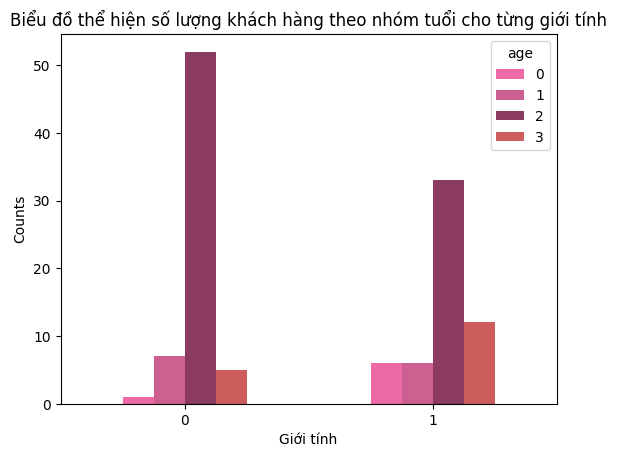

In [ ]:
barplot = cross.plot.bar(color=[(238/255,106/255,167/255), (205/255,96/255,144/255),(139/255,58/255,98/255),(205/255,92/255,92/255)],rot=0)
plt.title('Biểu đồ thể hiện số lượng khách hàng theo nhóm tuổi cho từng giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Counts')
plt.show();

### **Biểu đồ thể hiện tỷ lệ về tần suất ghé thăm của khách**

In [ ]:
visitNo = data['visitNo'].value_counts().sort_index()
print(visitNo, '\n')
visitNopct = data['visitNo'].value_counts()/sum(data['visitNo'].value_counts()) * 100
print('Tỷ lệ tần suất ghé thăm của khách')
print(visitNopct.sort_index())

0     2
1    26
2     9
3    76
4     9
Name: visitNo, dtype: int64 

Tỷ lệ tần suất ghé thăm của khách
0     1.639344
1    21.311475
2     7.377049
3    62.295082
4     7.377049
Name: visitNo, dtype: float64


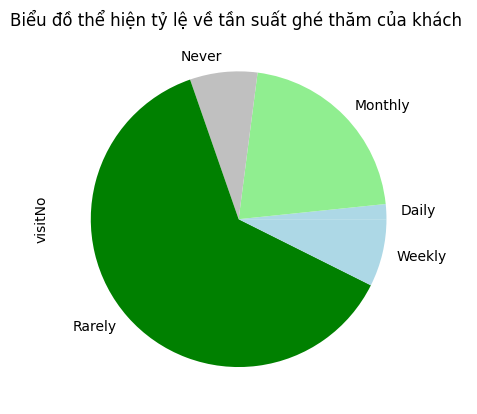

In [ ]:
my_labels = ['Daily', 'Monthly', 'Never', 'Rarely', 'Weekly']
my_colors = ['lightblue','lightgreen',
           'silver','green']
visitNo.plot.pie (title="Biểu đồ thể hiện tỷ lệ về tần suất ghé thăm của khách ",y ='visitNo',
            fontsize=10,labels=my_labels, colors=my_colors)
plt.show();

### **Biểu đồ thể hiện đánh giá mức tiền theo từng nhóm khách hàng**

In [ ]:
myfield1 = data['status']
myfield2 = data['priceRate']
cross = pd.crosstab(myfield1,myfield2)

cross

priceRate,1,2,3,4,5
status,,,,,
0,8,14,21,15,3
1,0,1,0,1,0
2,1,2,9,2,3
3,5,10,18,6,3


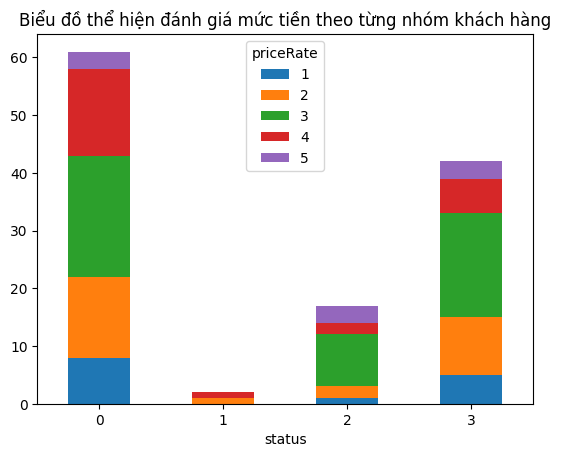

In [ ]:
pl = cross.plot(kind="bar",title = "Biểu đồ thể hiện đánh giá mức tiền theo từng nhóm khách hàng", stacked =True , rot = 0)

## Thy

### **Biểu đồ tỷ lệ thời gian của từng khách hàng ở lại Starbucks**

In [ ]:
import plotly.graph_objects as go
df = data['timeSpend'].value_counts()
df = pd.DataFrame({'Time':df.index, 'Counts':df.values})

labels = df['Time']
values = df['Counts']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole = 0.3)])
fig.update_layout(title_text = 'Biểu đồ tỷ lệ thời gian của từng khách hàng ở Starbucks', title_x = 0.5)
fig.show();

**Nhận xét**

TimeSpend:

* 0: Below 30 mins (dưới 30 phút)
* 1: 1h to 2h (từ 1 giờ đến 2 giờ)
* 2: 2h to 3h (từ 2 giờ đến 3 giờ)
* 3: 30 mins to 1h (từ 30 phút đến 1 giờ)
* 4: More than 3h (từ 3 giờ trở lên)

Qua biểu đồ trên ta thấy tỷ lệ khách hàng ở lại Starbucks uống nước lần lượt là:

* Dưới 30 phút có tỷ lệ chiếm khoảng 59.8% -> Chiếm tỷ trọng lớn nhất
* 1 giờ - 2 giờ có tỷ lệ chiếm khoảng 27.9%
* 2 giờ - 3 giờ có tỷ lệ chiếm khoảng 9.84%
* 30 phút - 1 giờ có tỷ lệ chiếm khoảng 1.64%
* 3 giờ trở lên có tỷ lệ chiếm khoảng 0.82% -> Chiếm tỷ trọng nhỏ nhất

=> Kết luận: Phần đông khách hàng thường ở lại không quá 30 phút khi đến với Starbuck. Điều này cho thấy họ đến để mua rồi về chứ không ở lại thưởng thức không gian cửa hàng.

### **Biểu đồ thể hiện tần suất ghé thăm Starbucks của từng nhóm khách hàng**

In [ ]:
df1 = data.groupby(by = ['status','visitNo'])
g = df1.size()
df2 = g.reset_index(name = 'Counts')
df2.head(10)

,status,visitNo,Counts
0,0,1,16
1,0,2,3
2,0,3,36
3,0,4,6
4,1,1,1
5,1,3,1
6,2,0,1
7,2,1,4
8,2,2,1
9,2,3,9


In [ ]:
fig = px.parallel_categories(data,dimensions = ['status', 'visitNo'],
                             color = 'visitNo', color_continuous_scale = "agsunset",
                             title = 'Biểu đồ thể hiện tần suất ghé thăm Starbucks của từng nhóm khách hàng',
                             width = 1000, height = 600)
fig.show();

**Nhận xét**

Status:

* 0: Employed
* 1: Housewife
* 2: Self-employed
* 3: Student

VisitNo:

* 0: Daily
* 1: Monthly
* 2: Never
* 3: Rarely
* 4: Weekly

+Đối với nhóm khách hàng 0 (Employed): Có 61 khách hàng đến cửa hàng mua thức uống. Phần lớn khoảng 59% khách hàng hiếm khi ghé thăm thương hiệu Starbucks, 26.2% khách hàng ghé thăm hàng tháng.

+Đối với nhóm khách hàng 1 (Housewife): Chỉ có 2 vị khách trong tổng số 113 khách mua thức uống tại cửa hàng. Trong đó 1 khách hiếm khi đến thăm Starbucks, còn 1 khách đến thăm hàng tháng

+Đối với nhóm khách hàng 2 (Self-employed): Có 9 khách hàng hiếm khi ghé thăm Starbucks (chiếm 56.25%), 4 khách ghé thăm hàng tháng (chiếm 25%)

+Đối với nhóm khách hàng 3 (Student): Có 41 khách hàng trong 113 khách đến với Starbucks thuộc nhóm này. Phần lớn khách hàng hiếm khi đến với cửa hàng để mua thức uống

=> Cần đánh mạnh phát triển vào phân khúc nhóm khách hàng Employed (có việc làm) bởi họ có thu nhập ổn định so với mức giá cao hơn thị trường thức uống của Starbucks. Họ sẵn sàng chi tiêu cho việc ăn uống tại thương hiệu nổi tiếng này.

### **Biểu đồ thể hiện mức độ chi trả của khách hàng đến Starbucks theo từng nhóm tuổi**

In [ ]:
mycol1 = data['age']
mycol2 = data['spendPurchase']
mycrosstab = pd.crosstab(mycol1,mycol2)
mycrosstab = mycrosstab.rename(index = {0:'40 and above',1:'Below 20',2:'From 20 to 29',3:'From 30 to 39'})
mycrosstab

spendPurchase,0,1,2,3
age,,,,
40 and above,4,1,2,0
Below 20,2,9,0,2
From 20 to 29,29,42,4,10
From 30 to 39,10,6,1,0


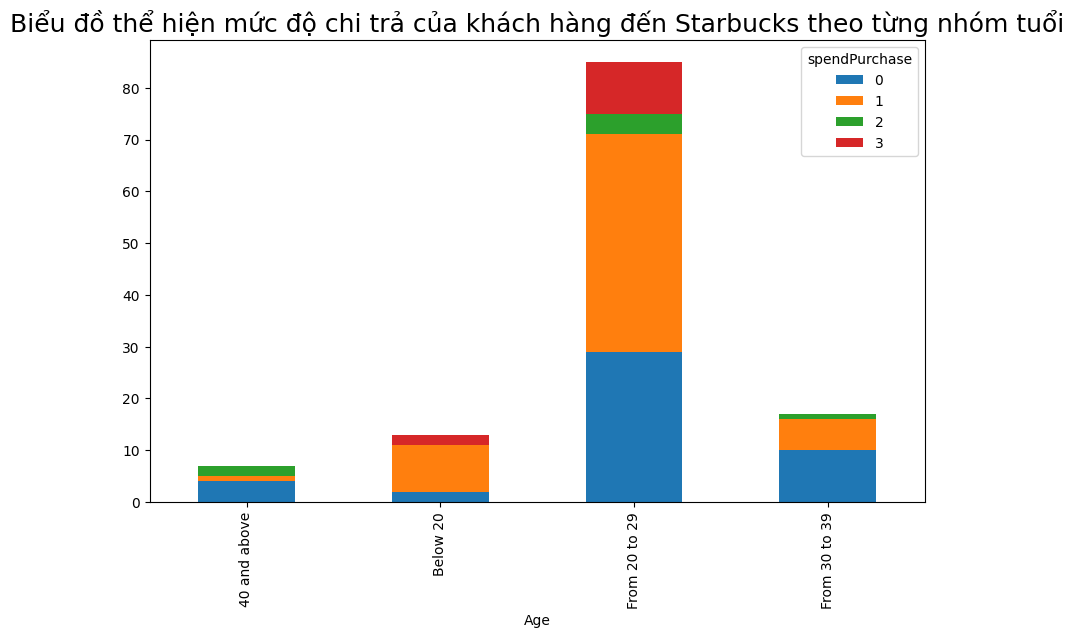

In [ ]:
mycrosstab.plot(kind = 'bar',stacked = True, figsize=(10, 6))
plt.xlabel("Age")
plt.title("Biểu đồ thể hiện mức độ chi trả của khách hàng đến Starbucks theo từng nhóm tuổi", size = 18)
plt.show();

**Nhận xét**

SpendPurchase:

* 0: Zero
* 1: Less than RM20
* 2: RM20 to RM40
* 3: More than RM40

+Đối với độ tuổi dưới 20 (Below 20): độ tuổi này kinh tế chưa ổn định nên mức chi trả đa phần là ở mức điểm 1 (dưới 20RM)

+Đối với độ tuổi từ 20 - 29 (From 20 to 29): độ tuổi thuộc nhóm tuổi lao động, đây cũng là nhóm đối tượng khách hàng tiềm năng mà thương hiệu nhắm đến. Có thể thấy khoảng 34.1% khách hàng chịu chi tiêu cho bữa ăn uống của mình từ 20RM - 40RM (mức điểm 2), 49.4% khách chi trả dưới 20RM (mức điểm 1). Đặc biệt có xuất hiện các khách hàng chịu chi trả hơn 40RM (mức điểm 3).

+Đối với độ tuổi từ 30 - 39 (From 30 to 39): độ tuổi này dành khá ít thời gian lui tới các cửa hàng coffee, trà sữa,...vì họ còn phải chăm lo cho gia đình. Điều này có thể thấy chỉ có khoảng 6 khách hàng đến với cửa hàng chi trả ở mức dưới 20RM (mức điểm 1). Còn lại phần lớn là không đến mua.

+Đối với độ tuổi 40 trở lên: độ tuổi này là độ tuổi có phân khúc khách hàng thấp nhất trong 4 nhóm khách hàng. Họ không chịu bỏ tiền ra chi trả cho các buổi coffee ở thương hiệu này.

# **GIẢM CHIỀU DỮ LIỆU**

## **Phân phối chuẩn + One-way ANOVA (Thư + CNhung)**

###**Kiểm định điều kiện phân phối chuẩn tất cả các biến (Shapiro)**

In [ ]:
df_melt = pd.melt(data.reset_index(), id_vars = ['index'],
                  value_vars = ['gender','age','status','income', 'visitNo', 'method', 'timeSpend', 'location',
                                'membershipCard', 'itemPurchaseCoffee', 'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
                                'itemPurchaseSandwiches', 'spendPurchase', 'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
                                'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc', 'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
                                'promoMethodDisplay', 'promoMethodBillboard', 'loyal'])
print(df_melt)

      index variable  value
0         0   gender      0
1         1   gender      0
2         2   gender      1
3         3   gender      0
4         4   gender      1
...     ...      ...    ...
3655    117    loyal      1
3656    118    loyal      1
3657    119    loyal      0
3658    120    loyal      1
3659    121    loyal      0

[3660 rows x 3 columns]


Kiểm định Shapiro dựa trên Ordinary Least Squares (OLS) model


In [ ]:
df_melt.columns = ['index', 'features', 'value']
model = ols('value ~ C(features)', data = df_melt).fit()
shapiro, p = st.shapiro(model.resid)
print(f'Trị thống kê Shapiro = {shapiro:4f}, trị số p = {p:4f}')


Trị thống kê Shapiro = 0.949102, trị số p = 0.000000


###**One-way ANOVA**

In [ ]:
alpha = .05
## F-statistic và p-value
f, p = stats.f_oneway(data.gender, data.age, data.status, data.income, data.visitNo, data.method, data.timeSpend, data.location,
                                data.membershipCard, data.itemPurchaseCoffee, data.itempurchaseCold, data.itemPurchasePastries, data.itemPurchaseJuices,
                                data.itemPurchaseSandwiches, data.spendPurchase, data.productRate, data.priceRate, data.promoRate, data.ambianceRate, data.wifiRate,
                                data.serviceRate, data.chooseRate, data.promoMethodApp, data.promoMethodSoc, data.promoMethodEmail, data.promoMethodDeal, data.promoMethodFriend,
                                data.promoMethodDisplay, data.promoMethodBillboard, data.loyal)
print(f'* Trị số p = {p:.2f}, alpha = {alpha:.2f}')

if (p < alpha):
    print('* Trị số p < alpha cho nên bác bỏ H0 ==> CÓ sự khác biệt giữa các biến')
else:
    print('* KHÔNG bác bỏ H0 ==> KHÔNG có sự khác biệt giữa các biến')

## Tạo ANOVA table
anova_table = sm.stats.anova_lm(model, typ = 2)
print('\n* ANOVA table\n', anova_table)

anova_table = sm.stats.anova_lm(model, typ = 1) # có thêm cột mean_squared
print('\n* ANOVA table\n', anova_table)

* Trị số p = 0.00, alpha = 0.05
* Trị số p < alpha cho nên bác bỏ H0 ==> CÓ sự khác biệt giữa các biến

* ANOVA table
                   sum_sq      df           F  PR(>F)
C(features)  6674.428689    29.0  260.171151     0.0
Residual     3211.172131  3630.0         NaN     NaN

* ANOVA table
                  df       sum_sq     mean_sq           F  PR(>F)
C(features)    29.0  6674.428689  230.152713  260.171151     0.0
Residual     3630.0  3211.172131    0.884620         NaN     NaN


### **Hậu kiểm Tukey HSD**

In [ ]:
m_comp = pairwise_tukeyhsd(endog = df_melt['value'], groups = df_melt['features'], alpha = 0.05)
print(m_comp)
#dòng nào true thì cặp đó khác, false thì giống

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
                   age           ambianceRate   1.8361    0.0  1.3843  2.2879   True
                   age             chooseRate   1.5984    0.0  1.1466  2.0502   True
                   age                 gender  -1.4508    0.0 -1.9026  -0.999   True
                   age                 income  -0.6475    0.0 -1.0993 -0.1957   True
                   age     itemPurchaseCoffee  -1.2295    0.0 -1.6813 -0.7777   True
                   age     itemPurchaseJuices  -1.7869    0.0 -2.2387 -1.3351   True
                   age   itemPurchasePastries  -1.8852    0.0  -2.337 -1.4335   True
                   age itemPurchaseSandwiches  -1.8525    0.0 -2.3043 -1.4007   True
                   age       itempurchaseCold  -1.6066    0.0 -2.

## Chi-Squared Test (Thanh + Thy)

**Các cột cần kiểm định là:** 'gender', 'age', 'status', 'income', 'visitNo', 'method', 'timeSpend', 'location', 'membershipCard', 'spendPurchase', 'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate', 'serviceRate', 'chooseRate'

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
col = list(data.columns)
col_chi = col[col.index('gender'):col.index('membershipCard')+1] +(col[col.index('spendPurchase'):col.index('chooseRate')+1])

In [ ]:
col_chi

['gender',
 'age',
 'status',
 'income',
 'visitNo',
 'method',
 'timeSpend',
 'location',
 'membershipCard',
 'spendPurchase',
 'productRate',
 'priceRate',
 'promoRate',
 'ambianceRate',
 'wifiRate',
 'serviceRate',
 'chooseRate']

Tạo 1 DataFrame chứa các cột 'Feature 1', 'Feature 2' và 'p-value'.

Trong đó:
* Cột Feature 1 và Feature 2: cột chứa 2 biến phân loại mà ta cần kiểm định
* Cột p-value: chứa giá trị p-value tính được dùng điểm so sánh với alpha để bác bỏ H0 hay chấp nhận H0

Sử dụng hàm chi2_contingency có sẵn trong thư viện scipy.stats để thực hiện các kiểm định Chi-Squared.

In [ ]:
chi_sqr_result = pd.DataFrame(columns=['Feature 1', 'Feature 2', 'p-value'])

In [ ]:
alpha            = .05
confidence_level = (1 - alpha)

In [ ]:
for i in range (0, len(col_chi)-1):
  for j in range (i+1, len(col_chi)):
    table = pd.crosstab(data[col_chi[i]], data[col_chi[j]]) #tạo bảng tương quan giữa 2 biến phân loại
    stat, p, dof, expected = chi2_contingency(table) #kiểm định chi-squared
    chi_sqr_result.loc[len(chi_sqr_result)] = [col_chi[i], col_chi[j], round(p, 3)] #thêm kết quả p-value tương đương với cặp biến tương quan

Tạo cột 'Test Result' để hiện thị các kết quả sau khi lấy p-value so sánh với alpha.
* Nếu p-value < alpha --> bác bỏ H0 --> 2 biến nghiên cứu phụ thuộc lẫn nhau
* Ngược lại --> Chưa đủ cơ sở để bác bỏ H0 --> 2 biến nghiên cứu độc lập với nhau

In [ ]:
chi_sqr_result['Test Result'] = chi_sqr_result.apply(lambda x: 'bác bỏ H0' if x['p-value'] < alpha else 'Chưa đủ cơ sở để bác bỏ H0', axis=1)

In [ ]:
chi_sqr_result

,Feature 1,Feature 2,p-value,Test Result
0,gender,age,0.016,bác bỏ H0
1,gender,status,0.238,Chưa đủ cơ sở để bác bỏ H0
2,gender,income,0.009,bác bỏ H0
3,gender,visitNo,0.160,Chưa đủ cơ sở để bác bỏ H0
4,gender,method,0.231,Chưa đủ cơ sở để bác bỏ H0
...,...,...,...,...
131,ambianceRate,serviceRate,0.000,bác bỏ H0
132,ambianceRate,chooseRate,0.000,bác bỏ H0
133,wifiRate,serviceRate,0.000,bác bỏ H0
134,wifiRate,chooseRate,0.006,bác bỏ H0


In [ ]:
chi_sqr_result[chi_sqr_result['Test Result']=='bác bỏ H0']

,Feature 1,Feature 2,p-value,Test Result
0,gender,age,0.016,bác bỏ H0
2,gender,income,0.009,bác bỏ H0
5,gender,timeSpend,0.015,bác bỏ H0
16,age,status,0.000,bác bỏ H0
17,age,income,0.000,bác bỏ H0
23,age,spendPurchase,0.028,bác bỏ H0
31,status,income,0.000,bác bỏ H0
36,status,membershipCard,0.012,bác bỏ H0
37,status,spendPurchase,0.025,bác bỏ H0
47,income,timeSpend,0.010,bác bỏ H0


In [ ]:
chi_sqr_result[chi_sqr_result['Test Result'] !='bác bỏ H0']

,Feature 1,Feature 2,p-value,Test Result
1,gender,status,0.238,Chưa đủ cơ sở để bác bỏ H0
3,gender,visitNo,0.160,Chưa đủ cơ sở để bác bỏ H0
4,gender,method,0.231,Chưa đủ cơ sở để bác bỏ H0
6,gender,location,0.384,Chưa đủ cơ sở để bác bỏ H0
7,gender,membershipCard,0.594,Chưa đủ cơ sở để bác bỏ H0
...,...,...,...,...
103,membershipCard,promoRate,0.800,Chưa đủ cơ sở để bác bỏ H0
105,membershipCard,wifiRate,0.273,Chưa đủ cơ sở để bác bỏ H0
107,membershipCard,chooseRate,0.172,Chưa đủ cơ sở để bác bỏ H0
110,spendPurchase,promoRate,0.281,Chưa đủ cơ sở để bác bỏ H0


## PCA (TNhung + Nhơn)

**Cách 1:**

In [ ]:
target = 'loyal'
print('* Biến phân lớp:', target)

## Danh sách các features
nb_features = data.shape[1] - 1
features    = data.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features))

* Biến phân lớp: loyal
* Số lượng features = 30
  Các features: index, gender, age, status, income, visitNo, method, timeSpend, location, membershipCard, itemPurchaseCoffee, itempurchaseCold, itemPurchasePastries, itemPurchaseJuices, itemPurchaseSandwiches, spendPurchase, productRate, priceRate, promoRate, ambianceRate, wifiRate, serviceRate, chooseRate, promoMethodApp, promoMethodSoc, promoMethodEmail, promoMethodDeal, promoMethodFriend, promoMethodDisplay, promoMethodBillboard


In [ ]:
x = data.drop(columns = ['loyal'])

In [ ]:
pca = PCA().fit(x)

In [ ]:
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points)//0.01/100


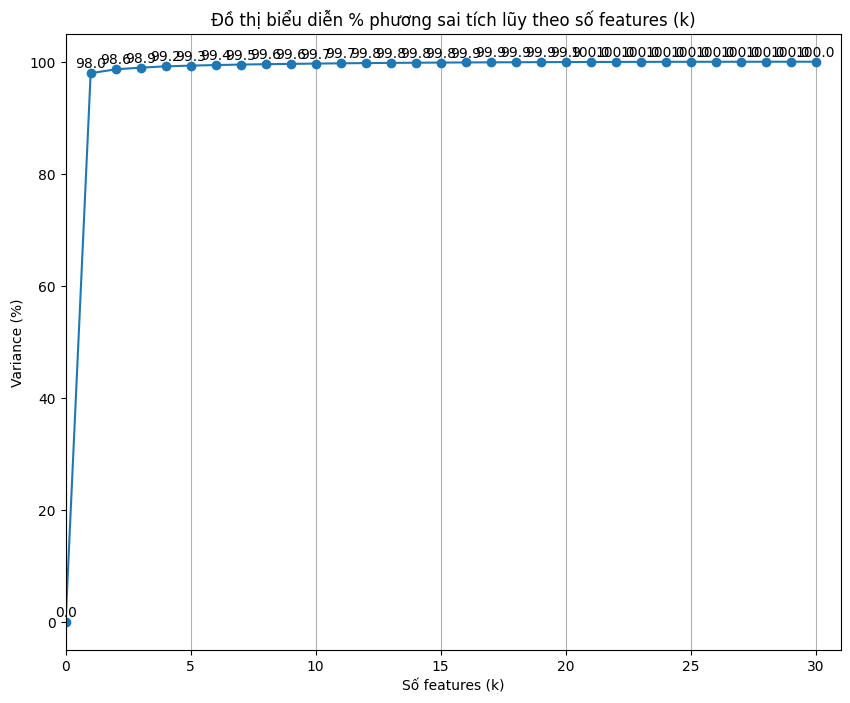

In [ ]:
## Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features --> chọn k theo điểm "gẫy"
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points)//0.01/100

plt.figure(figsize = (10, 8))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()

**Cách 2:**

In [ ]:
from sklearn.decomposition import PCA

## Giả sử muốn giữ lại tối thiểu 95% (ấn định một ngưỡng)
threshold = .95
percent   = threshold * 100

## Áp dụng PCA với ngưỡng đã chọn
pca = PCA(threshold)
pca.fit_transform(x)

## Giá trị k thu được, với phương sai tích lũy tương ứng
k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('   * Muốn phương sai tích lũy >= %.1f%%' %percent, 'thì k >= %d' %k, '--> %.1f%%' %var)

   * Muốn phương sai tích lũy >= 95.0% thì k >= 1 --> 98.0%


In [ ]:
## Kiểm chứng: Phân tích chi tiết theo các ngưỡng phương sai từ 50% đến 99%
A = np.array([.5, .6, .7, .8, .9, .95, .99])
for t in A:
    percent = t * 100
    pca     = PCA(t)

    pca.fit(x)
    k   = pca.n_components_
    var = sum(pca.explained_variance_ratio_) * 100
    print('- Muốn phương sai tích lũy >= %.1f%%' %percent, 'thì k >= %2d' %k,  '(var ~ %.1f%%)' %var)

- Muốn phương sai tích lũy >= 50.0% thì k >=  1 (var ~ 98.0%)
- Muốn phương sai tích lũy >= 60.0% thì k >=  1 (var ~ 98.0%)
- Muốn phương sai tích lũy >= 70.0% thì k >=  1 (var ~ 98.0%)
- Muốn phương sai tích lũy >= 80.0% thì k >=  1 (var ~ 98.0%)
- Muốn phương sai tích lũy >= 90.0% thì k >=  1 (var ~ 98.0%)
- Muốn phương sai tích lũy >= 95.0% thì k >=  1 (var ~ 98.0%)
- Muốn phương sai tích lũy >= 99.0% thì k >=  4 (var ~ 99.2%)


<Figure size 800x800 with 0 Axes>

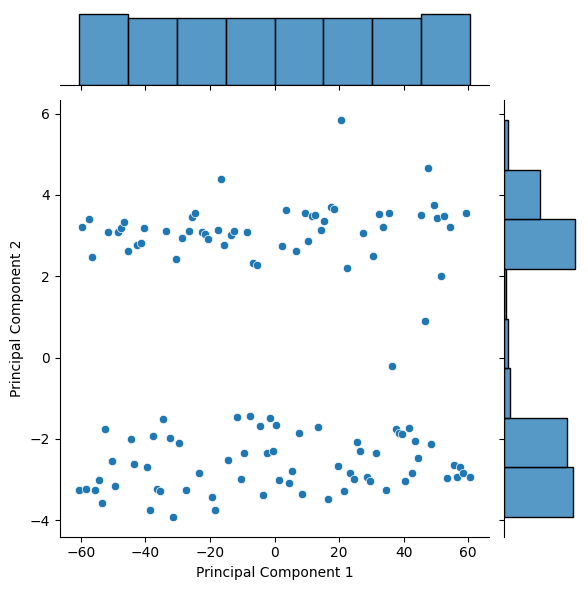

In [ ]:
## Biểu diễn trực quan dữ liệu với k = 2
k   = 2
pca = PCA(k)
pca.fit(x)

## Gán tên cho các Principal Components
PC_name = ['Principal Component 1', 'Principal Component 2']

## Chiếu dữ liệu vào không gian mới (Transform data)
B           = pca.transform(x)
principalDf = pd.DataFrame(data = B, columns = PC_name)

## Biểu diễn trực quan dữ liệu (KHÔNG phân lớp)
import seaborn           as sns
plt.figure(figsize = (8, 8))
sns.jointplot(x = PC_name[0], y = PC_name[1], data = principalDf)
plt.show()


* Ma trận B_T (có thêm biến phân lớp Class)
   Principal Component 1  Principal Component 2  loyal
0             -60.511016              -3.250230      1
1             -59.521586               3.208477      1
2             -58.486457              -3.227550      1
3             -57.496659               3.410106      0
4             -56.489571               2.467458      1 



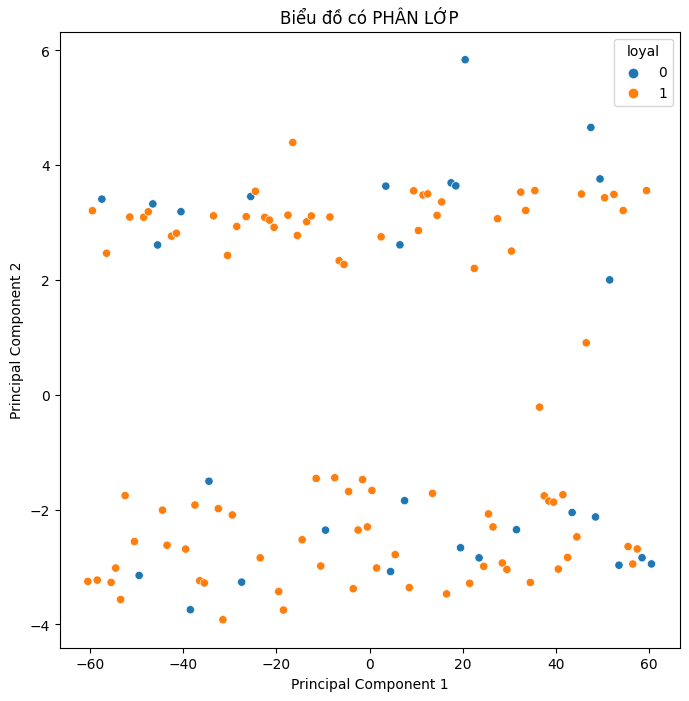

In [ ]:
## Lấy cột phân lớp (Class) trong file dữ liệu
target = 'loyal'
y = np.array(data.loyal)
y = pd.DataFrame(data = y, columns = [target])

## Ghép cột phân lớp (Class) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print('\n* Ma trận B_T (có thêm biến phân lớp Class)')
print(finalDf.head(), '\n')

## Biểu diễn trực quan dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf, hue = target, legend = 'full')
plt.show()

**Nhận Xét:**
*   Kết quả phân lớp không tốt vì với k = 2 thì phương sai tích lũy < 65%
*   Có thể cải thiện chất lượng ?

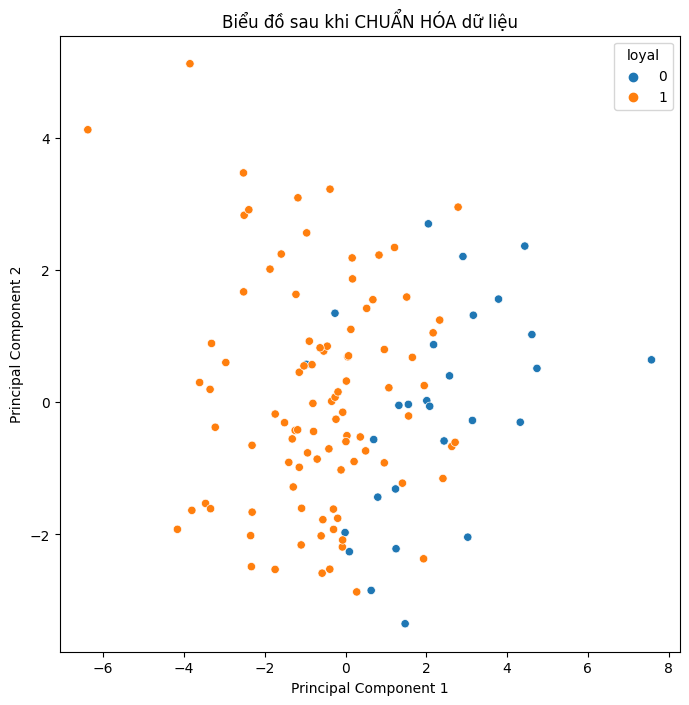

In [ ]:
pca_norm  = PCA(k)

## Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
data_norm = pd.DataFrame(StandardScaler().fit_transform(data)) # tự động loại cột Class

## Áp dụng PCA
pca_norm.fit(data_norm)

## Transform data
B_norm           = pca_norm.transform(data_norm)
principalDf_norm = pd.DataFrame(data = B_norm, columns = PC_name)

## Lấy cột phân lớp (Class) trong file dữ liệu
y = np.array(data.loyal)
y = pd.DataFrame(data = y, columns = [target])

## Ghép cột phân lớp (Class) vào ma trận PCA
finalDf_norm = pd.concat([principalDf_norm, y], axis = 1)

## Biểu diễn trực quan dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ sau khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf_norm, hue = target, legend = 'full')
plt.show()